# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = gym.make('BipedalWalker-v2')

random_seed = 10
env.seed(random_seed)

# from agent import Agent
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], 
#               random_seed=random_seed)

[10]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
env.action_space, env.observation_space

(Box(4,), Box(24,))

In [4]:
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

In [5]:
action_size, state_size

(4, 24)

In [6]:
env.observation_space.low, env.observation_space.high

(array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf], dtype=float32),
 array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       dtype=float32))

In [7]:
env.action_space.low, env.action_space.high

(array([-1., -1., -1., -1.], dtype=float32),
 array([1., 1., 1., 1.], dtype=float32))

In [8]:
env.reward_range

(-inf, inf)

### 3. Instantiate DDPG Agent

In [9]:
from agent import Agent

agent = Agent(s_size=state_size, a_size=action_size, random_seed=random_seed)

### 4. Train the Agent with DDPG

In [10]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=10000
# n_steps=1000
# n_learn=10
# learn_every=20
R_goal=0 # TOCHECK
Rs_deque = deque(maxlen=100)
meanRs = [] # plot
losses = []

In [11]:
for i_episode in range(n_episodes):
    
    s = env.reset() # s: state
    #print(s.shape)
    
    R = 0 # R: total reward

    #for i_step in range(n_steps):
    while True:
        
        s = np.reshape(s, [1, -1])
        a = agent.act(s) # a=[-1, 1]
        #print(a.shape)
        
        a = np.reshape(a, [-1])
        s2, r, done, _ = env.step(a)
        #print(s2.shape, r, done, _)
        
        s = np.reshape(s, [-1])
        agent.memory.add(s, a, r, s2, done)

        R += r                           # update the score (for each agent)
        s = s2                                # roll over states to next time step

        gloss, dloss, rewards, rewards_in = agent.start_learn()

        if done:
            break

    Rs_deque.append(R)
    meanR_deque = np.mean(Rs_deque) # print
    meanRs.append(meanR_deque) # plot
    losses.append([gloss, dloss])

    print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode+1, meanR_deque), 
          'Gloss:{:.4f}'.format(gloss), 'Dloss:{:.4f}'.format(dloss))
    
    if meanR_deque >= R_goal:
        torch.save(agent.g.state_dict(), 'g-bipedal.pth')
        torch.save(agent.d.state_dict(), 'd-bipedal.pth')
        break

Episode 1	Total Average Score: -121.67 Gloss:107.7873 Dloss:0.2372
Episode 2	Total Average Score: -117.50 Gloss:211.4118 Dloss:0.2714
Episode 3	Total Average Score: -116.73 Gloss:112.9799 Dloss:0.3292
Episode 4	Total Average Score: -116.52 Gloss:404.5683 Dloss:0.3819
Episode 5	Total Average Score: -114.59 Gloss:411.9354 Dloss:0.4177
Episode 6	Total Average Score: -114.23 Gloss:502.2628 Dloss:0.4422
Episode 7	Total Average Score: -115.50 Gloss:397.7689 Dloss:0.4223
Episode 8	Total Average Score: -116.46 Gloss:407.5596 Dloss:0.4838
Episode 9	Total Average Score: -116.57 Gloss:585.2207 Dloss:0.4899
Episode 10	Total Average Score: -119.37 Gloss:166.6045 Dloss:1.3826
Episode 11	Total Average Score: -117.75 Gloss:74.5382 Dloss:2.2328
Episode 12	Total Average Score: -120.23 Gloss:118.3853 Dloss:2.2898
Episode 13	Total Average Score: -119.70 Gloss:219.5809 Dloss:2.0731
Episode 14	Total Average Score: -120.70 Gloss:139.5578 Dloss:2.5375
Episode 15	Total Average Score: -119.86 Gloss:105.1269 Dlo

Episode 122	Total Average Score: -103.80 Gloss:171.2316 Dloss:2.0946
Episode 123	Total Average Score: -103.82 Gloss:189.3115 Dloss:1.8784
Episode 124	Total Average Score: -103.98 Gloss:203.7186 Dloss:1.7887
Episode 125	Total Average Score: -103.63 Gloss:173.1486 Dloss:2.0012
Episode 126	Total Average Score: -103.23 Gloss:157.9257 Dloss:1.8509
Episode 127	Total Average Score: -101.40 Gloss:205.4630 Dloss:1.8050
Episode 128	Total Average Score: -101.91 Gloss:195.0841 Dloss:1.5386
Episode 129	Total Average Score: -100.27 Gloss:165.0686 Dloss:1.2724
Episode 130	Total Average Score: -100.37 Gloss:143.6172 Dloss:1.3734
Episode 131	Total Average Score: -100.26 Gloss:177.1073 Dloss:1.5438
Episode 132	Total Average Score: -98.90 Gloss:195.3271 Dloss:1.5763
Episode 133	Total Average Score: -99.25 Gloss:210.3511 Dloss:1.2886
Episode 134	Total Average Score: -99.36 Gloss:190.6028 Dloss:1.5162
Episode 135	Total Average Score: -99.37 Gloss:168.2302 Dloss:1.4976
Episode 136	Total Average Score: -99.3

Episode 241	Total Average Score: -85.11 Gloss:249.2945 Dloss:-2.8090
Episode 242	Total Average Score: -86.61 Gloss:227.5757 Dloss:-2.8919
Episode 243	Total Average Score: -87.02 Gloss:248.9353 Dloss:-2.6063
Episode 244	Total Average Score: -88.59 Gloss:215.4457 Dloss:-2.9811
Episode 245	Total Average Score: -90.38 Gloss:216.5570 Dloss:-3.0978
Episode 246	Total Average Score: -90.60 Gloss:216.3515 Dloss:-2.9894
Episode 247	Total Average Score: -92.53 Gloss:240.0315 Dloss:-2.7208
Episode 248	Total Average Score: -92.97 Gloss:234.9942 Dloss:-2.9957
Episode 249	Total Average Score: -94.94 Gloss:226.7722 Dloss:-2.9547
Episode 250	Total Average Score: -96.83 Gloss:206.0506 Dloss:-2.8178
Episode 251	Total Average Score: -98.60 Gloss:255.8935 Dloss:-2.7211
Episode 252	Total Average Score: -98.61 Gloss:232.0475 Dloss:-2.8012
Episode 253	Total Average Score: -98.49 Gloss:250.2712 Dloss:-2.8406
Episode 254	Total Average Score: -98.52 Gloss:205.7373 Dloss:-2.9983
Episode 255	Total Average Score: -

Episode 359	Total Average Score: -108.74 Gloss:285.0998 Dloss:-2.3047
Episode 360	Total Average Score: -108.67 Gloss:253.1695 Dloss:-1.5920
Episode 361	Total Average Score: -108.85 Gloss:252.2348 Dloss:-2.0586
Episode 362	Total Average Score: -109.01 Gloss:268.2334 Dloss:-1.7688
Episode 363	Total Average Score: -108.96 Gloss:235.9136 Dloss:-1.9618
Episode 364	Total Average Score: -108.87 Gloss:267.5934 Dloss:-2.0924
Episode 365	Total Average Score: -108.74 Gloss:280.8174 Dloss:-1.9179
Episode 366	Total Average Score: -108.89 Gloss:258.4209 Dloss:-1.4605
Episode 367	Total Average Score: -108.93 Gloss:235.8765 Dloss:-2.1172
Episode 368	Total Average Score: -109.05 Gloss:267.3572 Dloss:-2.0735
Episode 369	Total Average Score: -109.17 Gloss:303.3765 Dloss:-1.9456
Episode 370	Total Average Score: -109.22 Gloss:243.1251 Dloss:-1.9966
Episode 371	Total Average Score: -109.15 Gloss:267.0161 Dloss:-2.0190
Episode 372	Total Average Score: -108.91 Gloss:291.4803 Dloss:-1.8918
Episode 373	Total Av

Episode 477	Total Average Score: -111.16 Gloss:271.9286 Dloss:-2.6895
Episode 478	Total Average Score: -111.14 Gloss:280.9427 Dloss:-2.0881
Episode 479	Total Average Score: -111.22 Gloss:264.9973 Dloss:-2.0540
Episode 480	Total Average Score: -111.27 Gloss:232.5934 Dloss:-2.2914
Episode 481	Total Average Score: -111.33 Gloss:281.8416 Dloss:-2.3220
Episode 482	Total Average Score: -111.26 Gloss:282.8907 Dloss:-2.4955
Episode 483	Total Average Score: -111.29 Gloss:296.5345 Dloss:-2.1484
Episode 484	Total Average Score: -111.19 Gloss:333.6761 Dloss:-2.3417
Episode 485	Total Average Score: -111.30 Gloss:294.3435 Dloss:-2.5217
Episode 486	Total Average Score: -111.32 Gloss:278.8765 Dloss:-2.2069
Episode 487	Total Average Score: -111.32 Gloss:327.2743 Dloss:-2.3922
Episode 488	Total Average Score: -111.18 Gloss:277.8257 Dloss:-2.4225
Episode 489	Total Average Score: -111.06 Gloss:352.4368 Dloss:-2.2895
Episode 490	Total Average Score: -110.97 Gloss:301.9637 Dloss:-2.3430
Episode 491	Total Av

Episode 595	Total Average Score: -106.92 Gloss:370.4382 Dloss:-1.6169
Episode 596	Total Average Score: -106.90 Gloss:375.2774 Dloss:-1.7230
Episode 597	Total Average Score: -106.88 Gloss:285.2065 Dloss:-1.7143
Episode 598	Total Average Score: -106.86 Gloss:290.8147 Dloss:-1.7470
Episode 599	Total Average Score: -106.81 Gloss:286.9456 Dloss:-1.5178
Episode 600	Total Average Score: -106.79 Gloss:289.5331 Dloss:-1.4764
Episode 601	Total Average Score: -106.76 Gloss:293.7668 Dloss:-1.6845
Episode 602	Total Average Score: -106.71 Gloss:287.7359 Dloss:-1.8044
Episode 603	Total Average Score: -106.68 Gloss:361.4708 Dloss:-1.8655
Episode 604	Total Average Score: -106.66 Gloss:252.5383 Dloss:-1.4459
Episode 605	Total Average Score: -106.64 Gloss:291.9794 Dloss:-1.4841
Episode 606	Total Average Score: -106.59 Gloss:308.9913 Dloss:-1.4960
Episode 607	Total Average Score: -106.56 Gloss:302.7694 Dloss:-1.6459
Episode 608	Total Average Score: -106.58 Gloss:278.0399 Dloss:-1.4466
Episode 609	Total Av

Episode 713	Total Average Score: -103.96 Gloss:353.0131 Dloss:-1.1545
Episode 714	Total Average Score: -103.98 Gloss:288.5346 Dloss:-1.4460
Episode 715	Total Average Score: -104.01 Gloss:359.5332 Dloss:-1.1703
Episode 716	Total Average Score: -104.00 Gloss:357.6919 Dloss:-0.8725
Episode 717	Total Average Score: -104.02 Gloss:342.0330 Dloss:-1.3863
Episode 718	Total Average Score: -103.94 Gloss:322.6922 Dloss:-0.7618
Episode 719	Total Average Score: -103.95 Gloss:358.9199 Dloss:-0.7777
Episode 720	Total Average Score: -103.96 Gloss:360.3435 Dloss:-0.8727
Episode 721	Total Average Score: -103.97 Gloss:311.3499 Dloss:-1.1190
Episode 722	Total Average Score: -103.96 Gloss:332.1271 Dloss:-1.3236
Episode 723	Total Average Score: -103.96 Gloss:441.1920 Dloss:-0.8319
Episode 724	Total Average Score: -103.97 Gloss:325.4304 Dloss:-0.7737
Episode 725	Total Average Score: -103.97 Gloss:323.2129 Dloss:-1.0024
Episode 726	Total Average Score: -103.97 Gloss:375.6229 Dloss:-0.6575
Episode 727	Total Av

Episode 831	Total Average Score: -104.33 Gloss:395.2686 Dloss:-0.7081
Episode 832	Total Average Score: -104.29 Gloss:320.0378 Dloss:-0.3412
Episode 833	Total Average Score: -104.29 Gloss:342.2270 Dloss:-0.5624
Episode 834	Total Average Score: -104.27 Gloss:334.8657 Dloss:-0.4252
Episode 835	Total Average Score: -104.25 Gloss:347.5165 Dloss:-0.8216
Episode 836	Total Average Score: -104.23 Gloss:404.3033 Dloss:-0.5051
Episode 837	Total Average Score: -104.21 Gloss:297.4896 Dloss:-0.5152
Episode 838	Total Average Score: -104.20 Gloss:293.1663 Dloss:-0.4268
Episode 839	Total Average Score: -104.18 Gloss:351.2784 Dloss:-0.1624
Episode 840	Total Average Score: -104.05 Gloss:325.1176 Dloss:-0.3538
Episode 841	Total Average Score: -104.01 Gloss:322.0723 Dloss:-0.1850
Episode 842	Total Average Score: -103.99 Gloss:314.4382 Dloss:-0.4730
Episode 843	Total Average Score: -103.96 Gloss:344.3892 Dloss:-0.1308
Episode 844	Total Average Score: -103.93 Gloss:363.1943 Dloss:-0.4352
Episode 845	Total Av

Episode 949	Total Average Score: -101.45 Gloss:324.6830 Dloss:-0.5066
Episode 950	Total Average Score: -101.43 Gloss:333.4817 Dloss:-0.3336
Episode 951	Total Average Score: -101.42 Gloss:300.0799 Dloss:-0.6261
Episode 952	Total Average Score: -101.41 Gloss:389.8116 Dloss:-0.8000
Episode 953	Total Average Score: -101.41 Gloss:350.7972 Dloss:-0.1848
Episode 954	Total Average Score: -101.46 Gloss:352.3719 Dloss:-0.3050
Episode 955	Total Average Score: -101.46 Gloss:318.7394 Dloss:-0.7225
Episode 956	Total Average Score: -101.46 Gloss:337.4114 Dloss:-0.2434
Episode 957	Total Average Score: -101.47 Gloss:328.1937 Dloss:-0.3409
Episode 958	Total Average Score: -101.46 Gloss:340.6269 Dloss:-0.4340
Episode 959	Total Average Score: -101.45 Gloss:313.5376 Dloss:-0.4183
Episode 960	Total Average Score: -101.38 Gloss:294.3542 Dloss:-0.3329
Episode 961	Total Average Score: -101.41 Gloss:304.5491 Dloss:-0.2279
Episode 962	Total Average Score: -101.42 Gloss:357.1865 Dloss:-0.6232
Episode 963	Total Av

Episode 1066	Total Average Score: -104.46 Gloss:322.9051 Dloss:0.2521
Episode 1067	Total Average Score: -104.45 Gloss:377.5453 Dloss:0.5717
Episode 1068	Total Average Score: -104.43 Gloss:320.2970 Dloss:0.3411
Episode 1069	Total Average Score: -104.42 Gloss:315.7581 Dloss:-0.2055
Episode 1070	Total Average Score: -104.42 Gloss:352.7888 Dloss:-0.0240
Episode 1071	Total Average Score: -104.44 Gloss:344.9897 Dloss:-0.0896
Episode 1072	Total Average Score: -104.37 Gloss:338.5813 Dloss:0.5311
Episode 1073	Total Average Score: -104.40 Gloss:309.3704 Dloss:-0.0815
Episode 1074	Total Average Score: -104.44 Gloss:285.5192 Dloss:0.3277
Episode 1075	Total Average Score: -104.47 Gloss:374.5663 Dloss:0.3406
Episode 1076	Total Average Score: -104.53 Gloss:339.8409 Dloss:0.4964
Episode 1077	Total Average Score: -104.59 Gloss:317.4108 Dloss:0.5010
Episode 1078	Total Average Score: -104.59 Gloss:339.1229 Dloss:0.0813
Episode 1079	Total Average Score: -104.53 Gloss:345.3980 Dloss:0.3290
Episode 1080	Tot

Episode 1183	Total Average Score: -104.61 Gloss:349.8146 Dloss:1.4092
Episode 1184	Total Average Score: -104.64 Gloss:424.7380 Dloss:0.8019
Episode 1185	Total Average Score: -104.54 Gloss:340.0765 Dloss:1.3480
Episode 1186	Total Average Score: -104.52 Gloss:354.8732 Dloss:1.3358
Episode 1187	Total Average Score: -104.58 Gloss:328.6619 Dloss:1.6955
Episode 1188	Total Average Score: -104.52 Gloss:374.6612 Dloss:1.7834
Episode 1189	Total Average Score: -104.55 Gloss:347.4098 Dloss:1.3714
Episode 1190	Total Average Score: -104.59 Gloss:408.7986 Dloss:1.1726
Episode 1191	Total Average Score: -104.59 Gloss:394.1268 Dloss:1.2988
Episode 1192	Total Average Score: -104.64 Gloss:452.5139 Dloss:1.6796
Episode 1193	Total Average Score: -104.69 Gloss:331.5338 Dloss:1.3996
Episode 1194	Total Average Score: -104.70 Gloss:394.6720 Dloss:1.4568
Episode 1195	Total Average Score: -104.72 Gloss:374.8365 Dloss:1.2319
Episode 1196	Total Average Score: -104.71 Gloss:359.0916 Dloss:1.3390
Episode 1197	Total A

Episode 1301	Total Average Score: -104.73 Gloss:311.7997 Dloss:2.4411
Episode 1302	Total Average Score: -104.64 Gloss:421.8228 Dloss:2.2897
Episode 1303	Total Average Score: -104.59 Gloss:359.1070 Dloss:2.4035
Episode 1304	Total Average Score: -104.60 Gloss:379.3557 Dloss:2.4112
Episode 1305	Total Average Score: -104.53 Gloss:386.5124 Dloss:2.4414
Episode 1306	Total Average Score: -104.58 Gloss:372.8536 Dloss:2.2624
Episode 1307	Total Average Score: -104.63 Gloss:411.0322 Dloss:2.5535
Episode 1308	Total Average Score: -104.61 Gloss:351.4024 Dloss:2.0194
Episode 1309	Total Average Score: -104.63 Gloss:367.0079 Dloss:2.4914
Episode 1310	Total Average Score: -104.54 Gloss:336.1912 Dloss:2.3031
Episode 1311	Total Average Score: -104.55 Gloss:409.2196 Dloss:2.9209
Episode 1312	Total Average Score: -104.56 Gloss:379.7546 Dloss:2.5572
Episode 1313	Total Average Score: -104.51 Gloss:348.4266 Dloss:2.5791
Episode 1314	Total Average Score: -104.53 Gloss:391.1646 Dloss:2.4491
Episode 1315	Total A

Episode 1419	Total Average Score: -105.72 Gloss:612.8972 Dloss:3.7118
Episode 1420	Total Average Score: -105.71 Gloss:403.0953 Dloss:2.7515
Episode 1421	Total Average Score: -105.69 Gloss:423.8033 Dloss:3.4360
Episode 1422	Total Average Score: -105.69 Gloss:352.7272 Dloss:3.0029
Episode 1423	Total Average Score: -105.68 Gloss:412.0309 Dloss:3.4198
Episode 1424	Total Average Score: -105.67 Gloss:378.2028 Dloss:3.2489
Episode 1425	Total Average Score: -105.67 Gloss:427.7879 Dloss:3.2166
Episode 1426	Total Average Score: -105.64 Gloss:368.4539 Dloss:2.9929
Episode 1427	Total Average Score: -105.63 Gloss:377.5051 Dloss:3.4181
Episode 1428	Total Average Score: -105.67 Gloss:418.8635 Dloss:3.4089
Episode 1429	Total Average Score: -105.68 Gloss:457.7495 Dloss:3.7020
Episode 1430	Total Average Score: -105.63 Gloss:358.5936 Dloss:3.0035
Episode 1431	Total Average Score: -105.66 Gloss:356.3096 Dloss:2.9110
Episode 1432	Total Average Score: -105.66 Gloss:408.5712 Dloss:3.1892
Episode 1433	Total A

Episode 1537	Total Average Score: -105.60 Gloss:358.7574 Dloss:3.4904
Episode 1538	Total Average Score: -105.61 Gloss:392.2045 Dloss:3.7325
Episode 1539	Total Average Score: -105.64 Gloss:440.2207 Dloss:3.5064
Episode 1540	Total Average Score: -105.62 Gloss:376.8872 Dloss:3.4780
Episode 1541	Total Average Score: -105.66 Gloss:423.7770 Dloss:3.6480
Episode 1542	Total Average Score: -105.64 Gloss:448.4470 Dloss:3.8452
Episode 1543	Total Average Score: -105.57 Gloss:453.3768 Dloss:3.9918
Episode 1544	Total Average Score: -105.57 Gloss:439.9899 Dloss:3.4151
Episode 1545	Total Average Score: -105.38 Gloss:438.0972 Dloss:3.7874
Episode 1546	Total Average Score: -105.35 Gloss:429.7878 Dloss:3.7011
Episode 1547	Total Average Score: -105.44 Gloss:424.3018 Dloss:3.4771
Episode 1548	Total Average Score: -105.44 Gloss:437.7418 Dloss:3.5602
Episode 1549	Total Average Score: -105.49 Gloss:379.4691 Dloss:3.6554
Episode 1550	Total Average Score: -105.51 Gloss:417.7281 Dloss:3.5276
Episode 1551	Total A

Episode 1655	Total Average Score: -105.70 Gloss:418.3036 Dloss:3.9005
Episode 1656	Total Average Score: -105.78 Gloss:562.3785 Dloss:3.6692
Episode 1657	Total Average Score: -105.73 Gloss:419.5637 Dloss:3.6166
Episode 1658	Total Average Score: -105.76 Gloss:414.8875 Dloss:3.8221
Episode 1659	Total Average Score: -105.74 Gloss:433.5461 Dloss:4.0441
Episode 1660	Total Average Score: -105.76 Gloss:389.6204 Dloss:3.5565
Episode 1661	Total Average Score: -105.78 Gloss:385.3935 Dloss:3.7477
Episode 1662	Total Average Score: -105.75 Gloss:416.1629 Dloss:3.8235
Episode 1663	Total Average Score: -105.75 Gloss:477.8394 Dloss:3.4973
Episode 1664	Total Average Score: -105.73 Gloss:435.7908 Dloss:3.8135
Episode 1665	Total Average Score: -105.73 Gloss:413.6311 Dloss:3.6856
Episode 1666	Total Average Score: -105.76 Gloss:439.0598 Dloss:3.2686
Episode 1667	Total Average Score: -105.82 Gloss:430.4718 Dloss:3.6176
Episode 1668	Total Average Score: -105.90 Gloss:404.8806 Dloss:3.5732
Episode 1669	Total A

Episode 1773	Total Average Score: -104.65 Gloss:486.7888 Dloss:3.0610
Episode 1774	Total Average Score: -104.66 Gloss:441.3795 Dloss:3.0917
Episode 1775	Total Average Score: -104.64 Gloss:451.6889 Dloss:3.2435
Episode 1776	Total Average Score: -104.75 Gloss:498.9747 Dloss:3.4972
Episode 1777	Total Average Score: -104.58 Gloss:380.1424 Dloss:3.5354
Episode 1778	Total Average Score: -104.42 Gloss:445.2122 Dloss:3.8204
Episode 1779	Total Average Score: -104.42 Gloss:453.4604 Dloss:3.1778
Episode 1780	Total Average Score: -104.36 Gloss:389.1993 Dloss:3.3312
Episode 1781	Total Average Score: -104.35 Gloss:501.1009 Dloss:2.9677
Episode 1782	Total Average Score: -104.24 Gloss:418.8748 Dloss:3.1438
Episode 1783	Total Average Score: -104.25 Gloss:483.3170 Dloss:3.9627
Episode 1784	Total Average Score: -104.23 Gloss:490.7713 Dloss:3.6237
Episode 1785	Total Average Score: -104.09 Gloss:423.7894 Dloss:2.8335
Episode 1786	Total Average Score: -104.17 Gloss:411.2603 Dloss:3.0875
Episode 1787	Total A

Episode 1891	Total Average Score: -107.36 Gloss:459.8123 Dloss:3.3536
Episode 1892	Total Average Score: -107.46 Gloss:466.6479 Dloss:3.2984
Episode 1893	Total Average Score: -107.53 Gloss:453.9164 Dloss:3.5332
Episode 1894	Total Average Score: -107.57 Gloss:430.7438 Dloss:3.6886
Episode 1895	Total Average Score: -107.55 Gloss:445.6613 Dloss:4.1545
Episode 1896	Total Average Score: -107.64 Gloss:516.1555 Dloss:3.5967
Episode 1897	Total Average Score: -107.83 Gloss:412.6581 Dloss:3.9777
Episode 1898	Total Average Score: -107.93 Gloss:369.0898 Dloss:3.4287
Episode 1899	Total Average Score: -107.84 Gloss:511.6183 Dloss:3.9579
Episode 1900	Total Average Score: -108.01 Gloss:478.2419 Dloss:3.8797
Episode 1901	Total Average Score: -107.96 Gloss:391.6890 Dloss:3.2770
Episode 1902	Total Average Score: -108.09 Gloss:519.0427 Dloss:3.8751
Episode 1903	Total Average Score: -108.24 Gloss:420.8387 Dloss:3.9050
Episode 1904	Total Average Score: -108.31 Gloss:432.1360 Dloss:3.6550
Episode 1905	Total A

Episode 2009	Total Average Score: -112.47 Gloss:470.2190 Dloss:3.9056
Episode 2010	Total Average Score: -112.40 Gloss:446.7293 Dloss:3.6009
Episode 2011	Total Average Score: -111.18 Gloss:467.3866 Dloss:3.9693
Episode 2012	Total Average Score: -110.99 Gloss:393.7693 Dloss:3.8386
Episode 2013	Total Average Score: -110.85 Gloss:443.8777 Dloss:4.0198
Episode 2014	Total Average Score: -110.70 Gloss:458.4032 Dloss:3.8258
Episode 2015	Total Average Score: -110.71 Gloss:509.2768 Dloss:3.7452
Episode 2016	Total Average Score: -110.57 Gloss:463.7240 Dloss:3.2889
Episode 2017	Total Average Score: -110.52 Gloss:420.2385 Dloss:3.7749
Episode 2018	Total Average Score: -110.61 Gloss:469.7770 Dloss:4.0302
Episode 2019	Total Average Score: -110.49 Gloss:463.2104 Dloss:4.0864
Episode 2020	Total Average Score: -110.36 Gloss:475.0975 Dloss:3.7098
Episode 2021	Total Average Score: -109.85 Gloss:504.5217 Dloss:4.0919
Episode 2022	Total Average Score: -109.84 Gloss:473.3305 Dloss:4.0465
Episode 2023	Total A

Episode 2127	Total Average Score: -103.43 Gloss:496.0512 Dloss:3.0499
Episode 2128	Total Average Score: -103.38 Gloss:427.4883 Dloss:3.6681
Episode 2129	Total Average Score: -103.34 Gloss:391.7549 Dloss:3.4593
Episode 2130	Total Average Score: -103.18 Gloss:472.1184 Dloss:4.0425
Episode 2131	Total Average Score: -103.13 Gloss:394.7325 Dloss:3.8421
Episode 2132	Total Average Score: -103.02 Gloss:449.5681 Dloss:4.1017
Episode 2133	Total Average Score: -102.81 Gloss:491.5664 Dloss:3.2111
Episode 2134	Total Average Score: -102.67 Gloss:480.4810 Dloss:4.0943
Episode 2135	Total Average Score: -102.66 Gloss:410.8755 Dloss:4.2293
Episode 2136	Total Average Score: -102.56 Gloss:413.8388 Dloss:3.9075
Episode 2137	Total Average Score: -102.56 Gloss:485.5231 Dloss:3.5004
Episode 2138	Total Average Score: -102.56 Gloss:533.5724 Dloss:4.3982
Episode 2139	Total Average Score: -102.52 Gloss:429.1592 Dloss:3.3894
Episode 2140	Total Average Score: -102.58 Gloss:471.7904 Dloss:4.2605
Episode 2141	Total A

Episode 2245	Total Average Score: -101.74 Gloss:519.6951 Dloss:4.2676
Episode 2246	Total Average Score: -101.68 Gloss:497.5330 Dloss:3.6614
Episode 2247	Total Average Score: -101.63 Gloss:478.5587 Dloss:3.4034
Episode 2248	Total Average Score: -101.56 Gloss:469.3038 Dloss:3.4290
Episode 2249	Total Average Score: -101.25 Gloss:584.7579 Dloss:3.3940
Episode 2250	Total Average Score: -101.23 Gloss:424.7914 Dloss:2.9349
Episode 2251	Total Average Score: -101.11 Gloss:487.0051 Dloss:4.0698
Episode 2252	Total Average Score: -100.97 Gloss:478.0473 Dloss:4.2378
Episode 2253	Total Average Score: -100.97 Gloss:472.3848 Dloss:3.4004
Episode 2254	Total Average Score: -101.03 Gloss:523.1514 Dloss:3.4563
Episode 2255	Total Average Score: -101.14 Gloss:490.4475 Dloss:3.6826
Episode 2256	Total Average Score: -101.09 Gloss:474.1409 Dloss:3.3925
Episode 2257	Total Average Score: -101.01 Gloss:506.4677 Dloss:3.5951
Episode 2258	Total Average Score: -100.94 Gloss:531.6106 Dloss:3.5414
Episode 2259	Total A

Episode 2363	Total Average Score: -104.37 Gloss:521.0453 Dloss:3.3903
Episode 2364	Total Average Score: -104.41 Gloss:503.2661 Dloss:2.3516
Episode 2365	Total Average Score: -104.10 Gloss:517.9910 Dloss:2.6506
Episode 2366	Total Average Score: -104.05 Gloss:443.1528 Dloss:2.7737
Episode 2367	Total Average Score: -104.04 Gloss:528.8839 Dloss:2.5994
Episode 2368	Total Average Score: -103.90 Gloss:433.9513 Dloss:2.9168
Episode 2369	Total Average Score: -103.84 Gloss:533.2740 Dloss:1.8840
Episode 2370	Total Average Score: -103.81 Gloss:512.5662 Dloss:3.3973
Episode 2371	Total Average Score: -103.81 Gloss:515.5002 Dloss:2.7032
Episode 2372	Total Average Score: -103.86 Gloss:491.8109 Dloss:2.5814
Episode 2373	Total Average Score: -103.87 Gloss:468.3902 Dloss:2.3977
Episode 2374	Total Average Score: -103.84 Gloss:472.6899 Dloss:2.2603
Episode 2375	Total Average Score: -103.98 Gloss:499.3089 Dloss:2.7110
Episode 2376	Total Average Score: -103.94 Gloss:418.6005 Dloss:2.8919
Episode 2377	Total A

Episode 2481	Total Average Score: -102.93 Gloss:444.6075 Dloss:2.4249
Episode 2482	Total Average Score: -102.92 Gloss:492.7948 Dloss:2.1585
Episode 2483	Total Average Score: -102.88 Gloss:506.4795 Dloss:2.0849
Episode 2484	Total Average Score: -102.95 Gloss:431.7264 Dloss:2.5749
Episode 2485	Total Average Score: -102.99 Gloss:462.0181 Dloss:2.0860
Episode 2486	Total Average Score: -103.00 Gloss:631.9937 Dloss:2.5779
Episode 2487	Total Average Score: -102.99 Gloss:509.4964 Dloss:2.1782
Episode 2488	Total Average Score: -103.11 Gloss:463.6282 Dloss:2.4193
Episode 2489	Total Average Score: -103.12 Gloss:531.5347 Dloss:2.5814
Episode 2490	Total Average Score: -103.04 Gloss:554.6255 Dloss:2.9381
Episode 2491	Total Average Score: -103.07 Gloss:483.6447 Dloss:2.1750
Episode 2492	Total Average Score: -103.09 Gloss:462.2950 Dloss:1.7831
Episode 2493	Total Average Score: -103.13 Gloss:520.6812 Dloss:2.0578
Episode 2494	Total Average Score: -103.00 Gloss:471.6174 Dloss:2.7993
Episode 2495	Total A

Episode 2599	Total Average Score: -103.56 Gloss:540.6719 Dloss:2.6393
Episode 2600	Total Average Score: -103.54 Gloss:543.3900 Dloss:2.5555
Episode 2601	Total Average Score: -103.53 Gloss:560.7935 Dloss:2.4373
Episode 2602	Total Average Score: -103.54 Gloss:559.2758 Dloss:3.1590
Episode 2603	Total Average Score: -103.54 Gloss:492.4591 Dloss:3.0719
Episode 2604	Total Average Score: -103.55 Gloss:542.1975 Dloss:2.9402
Episode 2605	Total Average Score: -103.62 Gloss:553.5464 Dloss:3.3210
Episode 2606	Total Average Score: -103.59 Gloss:553.9618 Dloss:2.9103
Episode 2607	Total Average Score: -103.50 Gloss:482.0806 Dloss:3.0976
Episode 2608	Total Average Score: -103.56 Gloss:646.8613 Dloss:2.7272
Episode 2609	Total Average Score: -103.53 Gloss:551.5065 Dloss:3.5357
Episode 2610	Total Average Score: -103.57 Gloss:551.1423 Dloss:2.7732
Episode 2611	Total Average Score: -103.55 Gloss:635.4396 Dloss:3.3688
Episode 2612	Total Average Score: -103.59 Gloss:565.4193 Dloss:3.1916
Episode 2613	Total A

Episode 2717	Total Average Score: -103.82 Gloss:534.3582 Dloss:2.8399
Episode 2718	Total Average Score: -103.91 Gloss:551.1820 Dloss:3.1738
Episode 2719	Total Average Score: -103.91 Gloss:495.4363 Dloss:3.4649
Episode 2720	Total Average Score: -103.88 Gloss:532.4194 Dloss:2.9336
Episode 2721	Total Average Score: -103.86 Gloss:559.7950 Dloss:3.6672
Episode 2722	Total Average Score: -103.88 Gloss:436.0714 Dloss:2.8097
Episode 2723	Total Average Score: -103.91 Gloss:552.3967 Dloss:3.3585
Episode 2724	Total Average Score: -103.91 Gloss:504.1598 Dloss:2.9971
Episode 2725	Total Average Score: -103.81 Gloss:537.6864 Dloss:3.2086
Episode 2726	Total Average Score: -103.79 Gloss:523.0714 Dloss:3.7682
Episode 2727	Total Average Score: -103.75 Gloss:526.3638 Dloss:3.6672
Episode 2728	Total Average Score: -103.71 Gloss:523.2205 Dloss:2.9520
Episode 2729	Total Average Score: -103.71 Gloss:521.8082 Dloss:3.1879
Episode 2730	Total Average Score: -103.68 Gloss:533.2567 Dloss:3.2416
Episode 2731	Total A

Episode 2835	Total Average Score: -102.12 Gloss:557.5081 Dloss:3.3118
Episode 2836	Total Average Score: -102.18 Gloss:567.9506 Dloss:3.5117
Episode 2837	Total Average Score: -102.22 Gloss:525.4337 Dloss:3.4758
Episode 2838	Total Average Score: -102.17 Gloss:560.2753 Dloss:3.3732
Episode 2839	Total Average Score: -102.14 Gloss:589.7388 Dloss:2.6866
Episode 2840	Total Average Score: -102.09 Gloss:550.8094 Dloss:3.5416
Episode 2841	Total Average Score: -102.07 Gloss:651.8693 Dloss:3.8377
Episode 2842	Total Average Score: -102.10 Gloss:572.1180 Dloss:3.5111
Episode 2843	Total Average Score: -102.12 Gloss:559.4260 Dloss:3.6217
Episode 2844	Total Average Score: -102.15 Gloss:512.9241 Dloss:3.3669
Episode 2845	Total Average Score: -102.14 Gloss:543.2238 Dloss:3.4175
Episode 2846	Total Average Score: -102.14 Gloss:556.6586 Dloss:3.6590
Episode 2847	Total Average Score: -102.12 Gloss:602.2950 Dloss:3.5943
Episode 2848	Total Average Score: -102.18 Gloss:529.8289 Dloss:3.4597
Episode 2849	Total A

Episode 2953	Total Average Score: -101.91 Gloss:580.7912 Dloss:2.8550
Episode 2954	Total Average Score: -101.95 Gloss:563.1879 Dloss:2.3309
Episode 2955	Total Average Score: -101.98 Gloss:560.0475 Dloss:2.7470
Episode 2956	Total Average Score: -101.91 Gloss:532.0242 Dloss:3.2952
Episode 2957	Total Average Score: -101.87 Gloss:613.7858 Dloss:2.7032
Episode 2958	Total Average Score: -101.86 Gloss:540.9207 Dloss:3.4904
Episode 2959	Total Average Score: -101.96 Gloss:647.6307 Dloss:3.3098
Episode 2960	Total Average Score: -101.87 Gloss:633.7009 Dloss:2.7496
Episode 2961	Total Average Score: -101.88 Gloss:483.8907 Dloss:2.7600
Episode 2962	Total Average Score: -101.90 Gloss:585.1366 Dloss:2.9119
Episode 2963	Total Average Score: -101.89 Gloss:599.7169 Dloss:3.0456
Episode 2964	Total Average Score: -101.85 Gloss:541.8062 Dloss:2.6463
Episode 2965	Total Average Score: -101.85 Gloss:560.6417 Dloss:2.7795
Episode 2966	Total Average Score: -101.84 Gloss:570.9761 Dloss:3.1358
Episode 2967	Total A

Episode 3071	Total Average Score: -101.76 Gloss:632.6038 Dloss:2.4387
Episode 3072	Total Average Score: -101.76 Gloss:614.6588 Dloss:2.9448
Episode 3073	Total Average Score: -101.73 Gloss:622.8214 Dloss:2.6564
Episode 3074	Total Average Score: -101.73 Gloss:567.5065 Dloss:3.3440
Episode 3075	Total Average Score: -101.74 Gloss:562.9203 Dloss:3.4992
Episode 3076	Total Average Score: -101.77 Gloss:566.8348 Dloss:3.3923
Episode 3077	Total Average Score: -101.79 Gloss:619.4597 Dloss:2.8635
Episode 3078	Total Average Score: -101.79 Gloss:640.0394 Dloss:3.4043
Episode 3079	Total Average Score: -101.76 Gloss:563.1133 Dloss:3.0196
Episode 3080	Total Average Score: -101.73 Gloss:538.6454 Dloss:2.9624
Episode 3081	Total Average Score: -101.69 Gloss:545.8646 Dloss:2.7180
Episode 3082	Total Average Score: -101.73 Gloss:650.2973 Dloss:3.4966
Episode 3083	Total Average Score: -101.71 Gloss:574.8767 Dloss:3.0187
Episode 3084	Total Average Score: -101.81 Gloss:578.6312 Dloss:2.9779
Episode 3085	Total A

Episode 3189	Total Average Score: -101.32 Gloss:542.0468 Dloss:3.1650
Episode 3190	Total Average Score: -101.37 Gloss:559.1187 Dloss:2.6392
Episode 3191	Total Average Score: -101.38 Gloss:566.9300 Dloss:3.3562
Episode 3192	Total Average Score: -101.43 Gloss:640.4284 Dloss:3.4601
Episode 3193	Total Average Score: -101.44 Gloss:539.1887 Dloss:2.6128
Episode 3194	Total Average Score: -101.43 Gloss:570.7531 Dloss:3.3080
Episode 3195	Total Average Score: -101.46 Gloss:568.5378 Dloss:3.1476
Episode 3196	Total Average Score: -101.44 Gloss:576.6284 Dloss:3.3490
Episode 3197	Total Average Score: -101.45 Gloss:522.8776 Dloss:2.8491
Episode 3198	Total Average Score: -101.45 Gloss:552.9636 Dloss:2.9801
Episode 3199	Total Average Score: -101.44 Gloss:592.3762 Dloss:2.6515
Episode 3200	Total Average Score: -101.47 Gloss:606.2694 Dloss:3.2833
Episode 3201	Total Average Score: -101.52 Gloss:613.4762 Dloss:3.6592
Episode 3202	Total Average Score: -101.58 Gloss:569.0652 Dloss:2.9218
Episode 3203	Total A

Episode 3307	Total Average Score: -104.10 Gloss:603.5895 Dloss:3.1211
Episode 3308	Total Average Score: -104.18 Gloss:589.0677 Dloss:3.2296
Episode 3309	Total Average Score: -104.24 Gloss:595.5864 Dloss:3.4599
Episode 3310	Total Average Score: -104.33 Gloss:563.9231 Dloss:3.2628
Episode 3311	Total Average Score: -104.30 Gloss:565.7466 Dloss:3.5587
Episode 3312	Total Average Score: -104.32 Gloss:624.6420 Dloss:2.8334
Episode 3313	Total Average Score: -104.34 Gloss:543.6144 Dloss:4.0876
Episode 3314	Total Average Score: -104.32 Gloss:587.9954 Dloss:3.8426
Episode 3315	Total Average Score: -104.38 Gloss:584.0233 Dloss:3.4610
Episode 3316	Total Average Score: -104.41 Gloss:552.3481 Dloss:3.6895
Episode 3317	Total Average Score: -104.42 Gloss:571.4709 Dloss:3.7051
Episode 3318	Total Average Score: -104.45 Gloss:574.5164 Dloss:3.7828
Episode 3319	Total Average Score: -104.46 Gloss:553.4743 Dloss:3.7653
Episode 3320	Total Average Score: -104.45 Gloss:523.5873 Dloss:4.0270
Episode 3321	Total A

Episode 3425	Total Average Score: -104.50 Gloss:563.6652 Dloss:4.0495
Episode 3426	Total Average Score: -104.54 Gloss:631.4982 Dloss:4.2012
Episode 3427	Total Average Score: -104.54 Gloss:616.0350 Dloss:4.3800
Episode 3428	Total Average Score: -104.48 Gloss:536.4758 Dloss:4.4541
Episode 3429	Total Average Score: -104.54 Gloss:614.8308 Dloss:4.3631
Episode 3430	Total Average Score: -104.53 Gloss:561.7269 Dloss:4.2123
Episode 3431	Total Average Score: -104.55 Gloss:609.3766 Dloss:3.9718
Episode 3432	Total Average Score: -104.59 Gloss:659.9478 Dloss:4.4636
Episode 3433	Total Average Score: -104.58 Gloss:578.1997 Dloss:4.4749
Episode 3434	Total Average Score: -104.57 Gloss:545.2703 Dloss:4.5826
Episode 3435	Total Average Score: -104.54 Gloss:588.3138 Dloss:4.5756
Episode 3436	Total Average Score: -104.62 Gloss:608.6238 Dloss:4.4537
Episode 3437	Total Average Score: -104.62 Gloss:545.4647 Dloss:4.5589
Episode 3438	Total Average Score: -104.60 Gloss:548.1566 Dloss:3.4419
Episode 3439	Total A

Episode 3543	Total Average Score: -105.75 Gloss:594.5894 Dloss:4.9042
Episode 3544	Total Average Score: -105.78 Gloss:589.9608 Dloss:4.9812
Episode 3545	Total Average Score: -105.80 Gloss:701.2290 Dloss:4.3056
Episode 3546	Total Average Score: -105.82 Gloss:606.1527 Dloss:4.9178
Episode 3547	Total Average Score: -105.73 Gloss:593.1951 Dloss:4.5536
Episode 3548	Total Average Score: -105.70 Gloss:678.2750 Dloss:4.5115
Episode 3549	Total Average Score: -105.72 Gloss:564.9487 Dloss:5.3334
Episode 3550	Total Average Score: -105.60 Gloss:566.3790 Dloss:5.4640
Episode 3551	Total Average Score: -105.51 Gloss:608.5001 Dloss:4.7980
Episode 3552	Total Average Score: -105.49 Gloss:572.5383 Dloss:4.9363
Episode 3553	Total Average Score: -105.44 Gloss:559.4130 Dloss:4.5832
Episode 3554	Total Average Score: -105.48 Gloss:580.9568 Dloss:4.7758
Episode 3555	Total Average Score: -105.49 Gloss:748.0646 Dloss:5.1415
Episode 3556	Total Average Score: -105.52 Gloss:502.5759 Dloss:4.8419
Episode 3557	Total A

Episode 3661	Total Average Score: -106.63 Gloss:544.8875 Dloss:5.7829
Episode 3662	Total Average Score: -106.54 Gloss:609.9938 Dloss:5.9009
Episode 3663	Total Average Score: -106.51 Gloss:623.4332 Dloss:5.2746
Episode 3664	Total Average Score: -106.45 Gloss:592.3777 Dloss:5.9776
Episode 3665	Total Average Score: -106.45 Gloss:648.4381 Dloss:6.2349
Episode 3666	Total Average Score: -106.37 Gloss:616.0104 Dloss:5.8712
Episode 3667	Total Average Score: -106.31 Gloss:585.7919 Dloss:5.8592
Episode 3668	Total Average Score: -106.26 Gloss:563.8937 Dloss:6.2544
Episode 3669	Total Average Score: -106.22 Gloss:633.9761 Dloss:5.6896
Episode 3670	Total Average Score: -106.10 Gloss:658.4852 Dloss:5.8888
Episode 3671	Total Average Score: -106.06 Gloss:603.5452 Dloss:6.4283
Episode 3672	Total Average Score: -106.03 Gloss:626.2248 Dloss:6.1209
Episode 3673	Total Average Score: -105.95 Gloss:596.5280 Dloss:5.9611
Episode 3674	Total Average Score: -106.02 Gloss:632.3142 Dloss:5.8869
Episode 3675	Total A

Episode 3779	Total Average Score: -105.70 Gloss:669.2563 Dloss:6.1175
Episode 3780	Total Average Score: -105.65 Gloss:635.6886 Dloss:6.1655
Episode 3781	Total Average Score: -105.57 Gloss:569.9445 Dloss:6.1859
Episode 3782	Total Average Score: -105.55 Gloss:634.8058 Dloss:5.7405
Episode 3783	Total Average Score: -105.56 Gloss:559.7782 Dloss:5.4029
Episode 3784	Total Average Score: -105.48 Gloss:569.6371 Dloss:5.1736
Episode 3785	Total Average Score: -105.37 Gloss:547.3674 Dloss:5.9728
Episode 3786	Total Average Score: -105.37 Gloss:563.3515 Dloss:5.9142
Episode 3787	Total Average Score: -105.38 Gloss:602.1458 Dloss:5.4793
Episode 3788	Total Average Score: -105.39 Gloss:576.8910 Dloss:6.7667
Episode 3789	Total Average Score: -105.41 Gloss:565.4567 Dloss:5.3852
Episode 3790	Total Average Score: -105.40 Gloss:600.0486 Dloss:5.6684
Episode 3791	Total Average Score: -105.40 Gloss:584.7352 Dloss:6.6620
Episode 3792	Total Average Score: -105.40 Gloss:594.0461 Dloss:6.2762
Episode 3793	Total A

Episode 3897	Total Average Score: -103.96 Gloss:585.3533 Dloss:6.2029
Episode 3898	Total Average Score: -103.95 Gloss:568.3981 Dloss:6.0217
Episode 3899	Total Average Score: -103.97 Gloss:620.0169 Dloss:6.3475
Episode 3900	Total Average Score: -103.94 Gloss:600.1992 Dloss:5.7913
Episode 3901	Total Average Score: -103.93 Gloss:689.3933 Dloss:5.9481
Episode 3902	Total Average Score: -103.93 Gloss:550.5780 Dloss:5.5421
Episode 3903	Total Average Score: -103.93 Gloss:658.3267 Dloss:6.3403
Episode 3904	Total Average Score: -103.90 Gloss:599.1738 Dloss:5.9646
Episode 3905	Total Average Score: -103.84 Gloss:637.5630 Dloss:6.0255
Episode 3906	Total Average Score: -103.79 Gloss:552.5603 Dloss:5.8284
Episode 3907	Total Average Score: -103.81 Gloss:567.0074 Dloss:6.3851
Episode 3908	Total Average Score: -103.76 Gloss:556.2619 Dloss:5.9536
Episode 3909	Total Average Score: -103.76 Gloss:679.9554 Dloss:6.2216
Episode 3910	Total Average Score: -103.77 Gloss:556.1543 Dloss:5.8482
Episode 3911	Total A

Episode 4015	Total Average Score: -103.27 Gloss:629.1652 Dloss:6.1080
Episode 4016	Total Average Score: -103.22 Gloss:603.2069 Dloss:6.0413
Episode 4017	Total Average Score: -103.21 Gloss:621.9521 Dloss:6.1594
Episode 4018	Total Average Score: -103.22 Gloss:552.4459 Dloss:6.1489
Episode 4019	Total Average Score: -103.25 Gloss:616.7371 Dloss:5.1696
Episode 4020	Total Average Score: -103.24 Gloss:545.9456 Dloss:5.9572
Episode 4021	Total Average Score: -103.22 Gloss:512.0881 Dloss:5.5462
Episode 4022	Total Average Score: -103.27 Gloss:584.8745 Dloss:5.4006
Episode 4023	Total Average Score: -103.32 Gloss:578.3262 Dloss:5.6632
Episode 4024	Total Average Score: -103.35 Gloss:664.0260 Dloss:7.2389
Episode 4025	Total Average Score: -103.35 Gloss:719.9629 Dloss:5.9068
Episode 4026	Total Average Score: -103.32 Gloss:554.6560 Dloss:5.7955
Episode 4027	Total Average Score: -103.42 Gloss:592.6921 Dloss:6.0164
Episode 4028	Total Average Score: -103.42 Gloss:678.9304 Dloss:6.4248
Episode 4029	Total A

Episode 4133	Total Average Score: -104.23 Gloss:592.5978 Dloss:5.7419
Episode 4134	Total Average Score: -104.27 Gloss:599.0875 Dloss:5.8387
Episode 4135	Total Average Score: -104.28 Gloss:571.2550 Dloss:5.6883
Episode 4136	Total Average Score: -104.33 Gloss:639.3900 Dloss:5.9177
Episode 4137	Total Average Score: -104.34 Gloss:735.4713 Dloss:6.2559
Episode 4138	Total Average Score: -104.38 Gloss:591.0696 Dloss:6.2575
Episode 4139	Total Average Score: -104.44 Gloss:618.1396 Dloss:5.4176
Episode 4140	Total Average Score: -104.46 Gloss:688.2697 Dloss:6.9063
Episode 4141	Total Average Score: -104.49 Gloss:578.6298 Dloss:5.9688
Episode 4142	Total Average Score: -104.55 Gloss:604.4175 Dloss:6.7232
Episode 4143	Total Average Score: -104.54 Gloss:617.8022 Dloss:5.6309
Episode 4144	Total Average Score: -104.54 Gloss:653.6884 Dloss:6.4168
Episode 4145	Total Average Score: -104.62 Gloss:538.7076 Dloss:5.9904
Episode 4146	Total Average Score: -104.59 Gloss:558.6000 Dloss:6.4013
Episode 4147	Total A

Episode 4251	Total Average Score: -104.64 Gloss:607.5110 Dloss:6.0136
Episode 4252	Total Average Score: -104.65 Gloss:676.8915 Dloss:6.9327
Episode 4253	Total Average Score: -104.67 Gloss:621.0116 Dloss:6.7160
Episode 4254	Total Average Score: -104.67 Gloss:621.5818 Dloss:6.5534
Episode 4255	Total Average Score: -104.65 Gloss:585.8010 Dloss:6.7608
Episode 4256	Total Average Score: -104.58 Gloss:573.7086 Dloss:6.3379
Episode 4257	Total Average Score: -104.58 Gloss:641.1052 Dloss:6.6644
Episode 4258	Total Average Score: -104.57 Gloss:603.6821 Dloss:7.1221
Episode 4259	Total Average Score: -104.52 Gloss:639.6677 Dloss:7.5255
Episode 4260	Total Average Score: -104.52 Gloss:563.6281 Dloss:7.1797
Episode 4261	Total Average Score: -104.52 Gloss:563.4868 Dloss:6.8226
Episode 4262	Total Average Score: -104.59 Gloss:649.0125 Dloss:6.8350
Episode 4263	Total Average Score: -104.56 Gloss:550.6526 Dloss:6.6165
Episode 4264	Total Average Score: -104.56 Gloss:629.4741 Dloss:6.8870
Episode 4265	Total A

Episode 4369	Total Average Score: -103.57 Gloss:704.6574 Dloss:7.8087
Episode 4370	Total Average Score: -103.59 Gloss:633.3920 Dloss:7.5126
Episode 4371	Total Average Score: -103.56 Gloss:639.4934 Dloss:8.0281
Episode 4372	Total Average Score: -103.52 Gloss:639.8997 Dloss:7.2869
Episode 4373	Total Average Score: -103.50 Gloss:578.3871 Dloss:8.1558
Episode 4374	Total Average Score: -103.48 Gloss:561.5726 Dloss:7.3312
Episode 4375	Total Average Score: -103.55 Gloss:620.4442 Dloss:7.6752
Episode 4376	Total Average Score: -103.60 Gloss:645.5601 Dloss:7.5554
Episode 4377	Total Average Score: -103.58 Gloss:611.1649 Dloss:7.8273
Episode 4378	Total Average Score: -103.56 Gloss:576.0333 Dloss:8.1032
Episode 4379	Total Average Score: -103.59 Gloss:697.5815 Dloss:7.1268
Episode 4380	Total Average Score: -103.61 Gloss:684.0947 Dloss:8.4422
Episode 4381	Total Average Score: -103.65 Gloss:649.0367 Dloss:7.8232
Episode 4382	Total Average Score: -103.72 Gloss:629.5402 Dloss:7.6247
Episode 4383	Total A

Episode 4487	Total Average Score: -103.30 Gloss:654.1417 Dloss:7.9324
Episode 4488	Total Average Score: -103.31 Gloss:522.4630 Dloss:8.3030
Episode 4489	Total Average Score: -103.20 Gloss:573.7561 Dloss:8.5251
Episode 4490	Total Average Score: -103.22 Gloss:599.0601 Dloss:8.5244
Episode 4491	Total Average Score: -103.11 Gloss:641.2145 Dloss:8.0231
Episode 4492	Total Average Score: -103.00 Gloss:622.0916 Dloss:7.6348
Episode 4493	Total Average Score: -103.00 Gloss:597.5887 Dloss:8.2756
Episode 4494	Total Average Score: -103.00 Gloss:686.2876 Dloss:8.0123
Episode 4495	Total Average Score: -102.93 Gloss:745.2432 Dloss:8.3546
Episode 4496	Total Average Score: -102.89 Gloss:632.8872 Dloss:8.2229
Episode 4497	Total Average Score: -102.90 Gloss:597.0322 Dloss:8.8969
Episode 4498	Total Average Score: -102.90 Gloss:616.2623 Dloss:8.3857
Episode 4499	Total Average Score: -102.88 Gloss:642.8550 Dloss:8.7631
Episode 4500	Total Average Score: -102.83 Gloss:581.0548 Dloss:8.7013
Episode 4501	Total A

Episode 4605	Total Average Score: -104.38 Gloss:689.4498 Dloss:8.8432
Episode 4606	Total Average Score: -104.28 Gloss:576.7156 Dloss:9.3289
Episode 4607	Total Average Score: -104.36 Gloss:631.4667 Dloss:8.6253
Episode 4608	Total Average Score: -104.35 Gloss:588.4280 Dloss:8.7260
Episode 4609	Total Average Score: -104.40 Gloss:672.8077 Dloss:9.0961
Episode 4610	Total Average Score: -104.44 Gloss:776.8205 Dloss:9.7192
Episode 4611	Total Average Score: -104.46 Gloss:617.6276 Dloss:8.8520
Episode 4612	Total Average Score: -104.50 Gloss:628.3478 Dloss:9.1289
Episode 4613	Total Average Score: -104.55 Gloss:671.2833 Dloss:9.6057
Episode 4614	Total Average Score: -104.66 Gloss:603.6310 Dloss:9.5633
Episode 4615	Total Average Score: -104.68 Gloss:618.8671 Dloss:8.7014
Episode 4616	Total Average Score: -104.72 Gloss:666.4233 Dloss:8.8928
Episode 4617	Total Average Score: -104.69 Gloss:601.7053 Dloss:8.8876
Episode 4618	Total Average Score: -104.71 Gloss:599.6401 Dloss:9.3993
Episode 4619	Total A

Episode 4722	Total Average Score: -106.28 Gloss:595.9609 Dloss:9.7767
Episode 4723	Total Average Score: -106.37 Gloss:644.1829 Dloss:9.7164
Episode 4724	Total Average Score: -106.45 Gloss:602.5745 Dloss:9.4635
Episode 4725	Total Average Score: -106.59 Gloss:578.7098 Dloss:9.9266
Episode 4726	Total Average Score: -106.70 Gloss:657.7357 Dloss:10.3614
Episode 4727	Total Average Score: -106.74 Gloss:657.7000 Dloss:9.5860
Episode 4728	Total Average Score: -106.74 Gloss:686.3236 Dloss:9.6961
Episode 4729	Total Average Score: -106.85 Gloss:601.4950 Dloss:10.1292
Episode 4730	Total Average Score: -106.87 Gloss:596.2460 Dloss:9.5031
Episode 4731	Total Average Score: -106.87 Gloss:704.4677 Dloss:9.2820
Episode 4732	Total Average Score: -106.92 Gloss:660.2745 Dloss:9.2271
Episode 4733	Total Average Score: -107.08 Gloss:687.3093 Dloss:9.7816
Episode 4734	Total Average Score: -107.16 Gloss:631.2069 Dloss:9.9159
Episode 4735	Total Average Score: -107.25 Gloss:624.7742 Dloss:9.0527
Episode 4736	Total

Episode 4839	Total Average Score: -106.55 Gloss:633.7228 Dloss:9.7859
Episode 4840	Total Average Score: -106.63 Gloss:698.5062 Dloss:10.4669
Episode 4841	Total Average Score: -106.67 Gloss:594.4240 Dloss:10.2977
Episode 4842	Total Average Score: -106.76 Gloss:659.9566 Dloss:10.7485
Episode 4843	Total Average Score: -106.72 Gloss:681.2767 Dloss:10.1393
Episode 4844	Total Average Score: -106.68 Gloss:564.9488 Dloss:9.8792
Episode 4845	Total Average Score: -106.72 Gloss:626.7467 Dloss:10.2310
Episode 4846	Total Average Score: -106.76 Gloss:787.7911 Dloss:9.7306
Episode 4847	Total Average Score: -106.68 Gloss:601.8456 Dloss:9.8867
Episode 4848	Total Average Score: -106.68 Gloss:659.9353 Dloss:10.0098
Episode 4849	Total Average Score: -106.62 Gloss:672.6311 Dloss:10.1578
Episode 4850	Total Average Score: -106.49 Gloss:620.6404 Dloss:10.1132
Episode 4851	Total Average Score: -106.55 Gloss:646.9632 Dloss:10.2440
Episode 4852	Total Average Score: -106.57 Gloss:665.4479 Dloss:9.2792
Episode 485

Episode 4956	Total Average Score: -106.71 Gloss:682.0558 Dloss:10.2697
Episode 4957	Total Average Score: -106.72 Gloss:672.8927 Dloss:10.4381
Episode 4958	Total Average Score: -106.69 Gloss:628.6544 Dloss:10.0403
Episode 4959	Total Average Score: -106.70 Gloss:656.8488 Dloss:10.6004
Episode 4960	Total Average Score: -106.67 Gloss:727.7714 Dloss:9.9357
Episode 4961	Total Average Score: -106.78 Gloss:649.9175 Dloss:9.2862
Episode 4962	Total Average Score: -106.83 Gloss:666.2286 Dloss:9.2875
Episode 4963	Total Average Score: -106.83 Gloss:711.1750 Dloss:9.7876
Episode 4964	Total Average Score: -106.81 Gloss:630.0068 Dloss:9.9129
Episode 4965	Total Average Score: -106.75 Gloss:655.9789 Dloss:10.3992
Episode 4966	Total Average Score: -106.73 Gloss:655.1885 Dloss:10.0921
Episode 4967	Total Average Score: -106.66 Gloss:635.8165 Dloss:10.4005
Episode 4968	Total Average Score: -106.76 Gloss:661.4702 Dloss:10.8713
Episode 4969	Total Average Score: -106.87 Gloss:555.7239 Dloss:10.2056
Episode 497

Episode 5073	Total Average Score: -105.87 Gloss:684.3160 Dloss:9.7307
Episode 5074	Total Average Score: -105.84 Gloss:602.5747 Dloss:9.6034
Episode 5075	Total Average Score: -105.84 Gloss:677.0656 Dloss:9.0306
Episode 5076	Total Average Score: -105.59 Gloss:659.8397 Dloss:10.0570
Episode 5077	Total Average Score: -105.63 Gloss:714.2399 Dloss:9.2994
Episode 5078	Total Average Score: -105.58 Gloss:587.8273 Dloss:10.1161
Episode 5079	Total Average Score: -105.49 Gloss:664.9599 Dloss:10.4400
Episode 5080	Total Average Score: -105.46 Gloss:671.1536 Dloss:9.7970
Episode 5081	Total Average Score: -105.35 Gloss:690.8108 Dloss:9.4682
Episode 5082	Total Average Score: -105.34 Gloss:723.6060 Dloss:10.0531
Episode 5083	Total Average Score: -105.32 Gloss:619.0779 Dloss:9.3859
Episode 5084	Total Average Score: -105.43 Gloss:668.6085 Dloss:10.2321
Episode 5085	Total Average Score: -105.46 Gloss:610.9926 Dloss:9.5545
Episode 5086	Total Average Score: -105.53 Gloss:650.3760 Dloss:9.6878
Episode 5087	To

Episode 5190	Total Average Score: -109.31 Gloss:630.5674 Dloss:10.3132
Episode 5191	Total Average Score: -109.30 Gloss:765.7754 Dloss:9.7111
Episode 5192	Total Average Score: -109.33 Gloss:620.1732 Dloss:10.2857
Episode 5193	Total Average Score: -109.35 Gloss:679.4348 Dloss:9.8026
Episode 5194	Total Average Score: -109.35 Gloss:674.6162 Dloss:9.6809
Episode 5195	Total Average Score: -109.41 Gloss:569.1761 Dloss:9.5116
Episode 5196	Total Average Score: -109.50 Gloss:755.2134 Dloss:9.7580
Episode 5197	Total Average Score: -109.56 Gloss:712.8810 Dloss:9.7006
Episode 5198	Total Average Score: -109.77 Gloss:578.8220 Dloss:9.9831
Episode 5199	Total Average Score: -109.82 Gloss:661.6584 Dloss:9.2866
Episode 5200	Total Average Score: -109.79 Gloss:665.6287 Dloss:9.5889
Episode 5201	Total Average Score: -109.80 Gloss:769.3098 Dloss:9.2235
Episode 5202	Total Average Score: -109.78 Gloss:605.0466 Dloss:9.4926
Episode 5203	Total Average Score: -109.82 Gloss:695.0333 Dloss:9.5849
Episode 5204	Total

Episode 5307	Total Average Score: -109.15 Gloss:656.6752 Dloss:9.2066
Episode 5308	Total Average Score: -109.15 Gloss:791.8622 Dloss:9.8272
Episode 5309	Total Average Score: -109.14 Gloss:751.3062 Dloss:9.4402
Episode 5310	Total Average Score: -109.19 Gloss:721.8688 Dloss:10.2649
Episode 5311	Total Average Score: -109.18 Gloss:715.5657 Dloss:9.9038
Episode 5312	Total Average Score: -109.18 Gloss:722.9720 Dloss:9.7948
Episode 5313	Total Average Score: -109.10 Gloss:602.5194 Dloss:9.4767
Episode 5314	Total Average Score: -109.09 Gloss:664.2598 Dloss:9.7548
Episode 5315	Total Average Score: -109.10 Gloss:736.3856 Dloss:9.0485
Episode 5316	Total Average Score: -109.12 Gloss:632.3542 Dloss:9.7141
Episode 5317	Total Average Score: -109.14 Gloss:653.9927 Dloss:9.9174
Episode 5318	Total Average Score: -109.08 Gloss:785.6483 Dloss:9.9878
Episode 5319	Total Average Score: -109.15 Gloss:851.6729 Dloss:10.3597
Episode 5320	Total Average Score: -109.12 Gloss:746.9072 Dloss:9.8413
Episode 5321	Total

Episode 5424	Total Average Score: -107.95 Gloss:626.1838 Dloss:10.0754
Episode 5425	Total Average Score: -108.01 Gloss:628.2775 Dloss:10.1821
Episode 5426	Total Average Score: -108.03 Gloss:769.6838 Dloss:9.8575
Episode 5427	Total Average Score: -108.01 Gloss:661.7604 Dloss:10.1980
Episode 5428	Total Average Score: -108.00 Gloss:713.0575 Dloss:9.8168
Episode 5429	Total Average Score: -108.00 Gloss:692.4201 Dloss:9.4069
Episode 5430	Total Average Score: -107.97 Gloss:660.7808 Dloss:10.2663
Episode 5431	Total Average Score: -107.98 Gloss:673.8374 Dloss:10.1012
Episode 5432	Total Average Score: -108.02 Gloss:756.3032 Dloss:10.5224
Episode 5433	Total Average Score: -108.04 Gloss:760.1104 Dloss:10.1002
Episode 5434	Total Average Score: -108.03 Gloss:754.8480 Dloss:11.2576
Episode 5435	Total Average Score: -108.08 Gloss:659.6650 Dloss:10.2833
Episode 5436	Total Average Score: -108.09 Gloss:716.9860 Dloss:10.0235
Episode 5437	Total Average Score: -108.09 Gloss:756.8085 Dloss:10.4089
Episode 5

Episode 5540	Total Average Score: -107.00 Gloss:643.3815 Dloss:9.7851
Episode 5541	Total Average Score: -107.01 Gloss:698.4392 Dloss:10.3703
Episode 5542	Total Average Score: -106.99 Gloss:681.6417 Dloss:10.4042
Episode 5543	Total Average Score: -106.99 Gloss:694.9563 Dloss:10.1366
Episode 5544	Total Average Score: -106.97 Gloss:628.5793 Dloss:10.6468
Episode 5545	Total Average Score: -106.93 Gloss:753.2983 Dloss:10.3654
Episode 5546	Total Average Score: -106.90 Gloss:698.0192 Dloss:11.0199
Episode 5547	Total Average Score: -106.86 Gloss:775.3170 Dloss:9.7216
Episode 5548	Total Average Score: -106.86 Gloss:654.8977 Dloss:10.3798
Episode 5549	Total Average Score: -106.87 Gloss:739.4526 Dloss:9.9679
Episode 5550	Total Average Score: -106.85 Gloss:763.4224 Dloss:11.0529
Episode 5551	Total Average Score: -106.80 Gloss:724.8690 Dloss:9.8657
Episode 5552	Total Average Score: -106.78 Gloss:770.5109 Dloss:10.3027
Episode 5553	Total Average Score: -106.79 Gloss:628.1896 Dloss:10.3900
Episode 55

Episode 5656	Total Average Score: -106.62 Gloss:828.2117 Dloss:10.8148
Episode 5657	Total Average Score: -106.60 Gloss:809.7641 Dloss:10.6154
Episode 5658	Total Average Score: -106.60 Gloss:645.6435 Dloss:10.7697
Episode 5659	Total Average Score: -106.65 Gloss:701.1365 Dloss:10.2634
Episode 5660	Total Average Score: -106.66 Gloss:755.8102 Dloss:10.0954
Episode 5661	Total Average Score: -106.67 Gloss:728.8499 Dloss:10.4638
Episode 5662	Total Average Score: -106.67 Gloss:708.8712 Dloss:10.5315
Episode 5663	Total Average Score: -106.67 Gloss:677.7435 Dloss:10.2620
Episode 5664	Total Average Score: -106.73 Gloss:668.9357 Dloss:10.4830
Episode 5665	Total Average Score: -106.73 Gloss:775.3594 Dloss:10.5813
Episode 5666	Total Average Score: -106.71 Gloss:767.7566 Dloss:10.2216
Episode 5667	Total Average Score: -106.70 Gloss:770.9098 Dloss:9.7361
Episode 5668	Total Average Score: -106.69 Gloss:607.6933 Dloss:10.7184
Episode 5669	Total Average Score: -106.68 Gloss:689.0569 Dloss:10.4737
Episode

Episode 5772	Total Average Score: -106.87 Gloss:752.7811 Dloss:10.3149
Episode 5773	Total Average Score: -106.90 Gloss:644.9957 Dloss:10.7021
Episode 5774	Total Average Score: -106.91 Gloss:672.8146 Dloss:10.9307
Episode 5775	Total Average Score: -106.93 Gloss:683.8751 Dloss:10.3495
Episode 5776	Total Average Score: -106.92 Gloss:730.7408 Dloss:10.1485
Episode 5777	Total Average Score: -107.03 Gloss:734.1552 Dloss:10.5041
Episode 5778	Total Average Score: -107.01 Gloss:684.3915 Dloss:10.6044
Episode 5779	Total Average Score: -107.01 Gloss:646.0077 Dloss:10.8441
Episode 5780	Total Average Score: -106.97 Gloss:725.9034 Dloss:11.5172
Episode 5781	Total Average Score: -107.02 Gloss:697.0126 Dloss:10.3369
Episode 5782	Total Average Score: -107.02 Gloss:633.0577 Dloss:11.1012
Episode 5783	Total Average Score: -107.01 Gloss:666.4006 Dloss:10.5026
Episode 5784	Total Average Score: -107.04 Gloss:684.3385 Dloss:11.0097
Episode 5785	Total Average Score: -107.04 Gloss:727.7393 Dloss:10.5270
Episod

Episode 5888	Total Average Score: -107.16 Gloss:676.7180 Dloss:11.3622
Episode 5889	Total Average Score: -107.14 Gloss:752.4705 Dloss:11.6952
Episode 5890	Total Average Score: -107.16 Gloss:644.4249 Dloss:11.1314
Episode 5891	Total Average Score: -107.15 Gloss:704.9786 Dloss:11.1178
Episode 5892	Total Average Score: -107.17 Gloss:616.2429 Dloss:10.7449
Episode 5893	Total Average Score: -107.20 Gloss:707.2000 Dloss:11.9616
Episode 5894	Total Average Score: -107.21 Gloss:772.8893 Dloss:10.8761
Episode 5895	Total Average Score: -107.22 Gloss:676.0592 Dloss:10.8344
Episode 5896	Total Average Score: -107.23 Gloss:775.0574 Dloss:11.5052
Episode 5897	Total Average Score: -107.11 Gloss:689.1057 Dloss:11.5997
Episode 5898	Total Average Score: -107.07 Gloss:738.0342 Dloss:11.3636
Episode 5899	Total Average Score: -107.03 Gloss:763.9977 Dloss:10.5958
Episode 5900	Total Average Score: -107.03 Gloss:645.2529 Dloss:11.2828
Episode 5901	Total Average Score: -107.04 Gloss:625.9373 Dloss:11.0557
Episod

Episode 6004	Total Average Score: -106.97 Gloss:714.8224 Dloss:11.7373
Episode 6005	Total Average Score: -106.96 Gloss:730.3590 Dloss:11.4179
Episode 6006	Total Average Score: -107.00 Gloss:703.2725 Dloss:10.6428
Episode 6007	Total Average Score: -106.97 Gloss:704.3599 Dloss:11.1264
Episode 6008	Total Average Score: -106.98 Gloss:674.1522 Dloss:11.2016
Episode 6009	Total Average Score: -106.96 Gloss:685.8694 Dloss:11.0099
Episode 6010	Total Average Score: -106.96 Gloss:716.5731 Dloss:10.8365
Episode 6011	Total Average Score: -107.01 Gloss:719.2426 Dloss:10.2767
Episode 6012	Total Average Score: -107.04 Gloss:725.3074 Dloss:11.5722
Episode 6013	Total Average Score: -107.02 Gloss:707.8857 Dloss:10.5266
Episode 6014	Total Average Score: -107.02 Gloss:809.8907 Dloss:11.6172
Episode 6015	Total Average Score: -107.02 Gloss:686.9553 Dloss:10.7502
Episode 6016	Total Average Score: -107.03 Gloss:681.6514 Dloss:11.1550
Episode 6017	Total Average Score: -106.98 Gloss:790.3948 Dloss:11.0812
Episod

Episode 6120	Total Average Score: -106.29 Gloss:670.6501 Dloss:11.3020
Episode 6121	Total Average Score: -106.30 Gloss:701.2859 Dloss:12.2637
Episode 6122	Total Average Score: -106.32 Gloss:757.9318 Dloss:11.2152
Episode 6123	Total Average Score: -106.27 Gloss:746.0680 Dloss:11.9192
Episode 6124	Total Average Score: -106.21 Gloss:783.6059 Dloss:12.1256
Episode 6125	Total Average Score: -106.23 Gloss:671.7393 Dloss:11.5968
Episode 6126	Total Average Score: -106.18 Gloss:852.0941 Dloss:12.2155
Episode 6127	Total Average Score: -106.17 Gloss:731.4448 Dloss:11.8591
Episode 6128	Total Average Score: -106.09 Gloss:840.6198 Dloss:11.3668
Episode 6129	Total Average Score: -106.06 Gloss:736.6873 Dloss:12.2244
Episode 6130	Total Average Score: -106.06 Gloss:764.9586 Dloss:13.0511
Episode 6131	Total Average Score: -106.06 Gloss:720.0764 Dloss:12.0131
Episode 6132	Total Average Score: -105.99 Gloss:695.4202 Dloss:11.8753
Episode 6133	Total Average Score: -105.99 Gloss:647.0068 Dloss:11.7535
Episod

Episode 6236	Total Average Score: -106.83 Gloss:776.9712 Dloss:11.1928
Episode 6237	Total Average Score: -106.84 Gloss:728.8015 Dloss:11.7664
Episode 6238	Total Average Score: -106.80 Gloss:781.2895 Dloss:12.4158
Episode 6239	Total Average Score: -106.91 Gloss:748.4283 Dloss:12.0999
Episode 6240	Total Average Score: -106.93 Gloss:658.8821 Dloss:11.8037
Episode 6241	Total Average Score: -107.00 Gloss:781.1956 Dloss:11.5702
Episode 6242	Total Average Score: -106.99 Gloss:756.6174 Dloss:11.9374
Episode 6243	Total Average Score: -106.99 Gloss:709.0184 Dloss:11.5804
Episode 6244	Total Average Score: -107.05 Gloss:705.9348 Dloss:11.3521
Episode 6245	Total Average Score: -107.03 Gloss:692.4756 Dloss:12.4550
Episode 6246	Total Average Score: -107.01 Gloss:764.1394 Dloss:12.0263
Episode 6247	Total Average Score: -107.03 Gloss:742.9534 Dloss:11.8050
Episode 6248	Total Average Score: -107.05 Gloss:694.9669 Dloss:11.6471
Episode 6249	Total Average Score: -107.04 Gloss:760.0320 Dloss:11.9080
Episod

Episode 6352	Total Average Score: -105.11 Gloss:670.9177 Dloss:12.2428
Episode 6353	Total Average Score: -105.14 Gloss:761.9188 Dloss:12.4312
Episode 6354	Total Average Score: -105.16 Gloss:720.8201 Dloss:12.4386
Episode 6355	Total Average Score: -105.20 Gloss:713.3191 Dloss:12.6087
Episode 6356	Total Average Score: -105.27 Gloss:753.7178 Dloss:12.4297
Episode 6357	Total Average Score: -105.28 Gloss:648.9216 Dloss:12.5164
Episode 6358	Total Average Score: -105.32 Gloss:884.8479 Dloss:12.3342
Episode 6359	Total Average Score: -105.30 Gloss:706.2234 Dloss:12.8323
Episode 6360	Total Average Score: -105.26 Gloss:713.6056 Dloss:12.7545
Episode 6361	Total Average Score: -105.22 Gloss:725.4214 Dloss:12.9241
Episode 6362	Total Average Score: -105.29 Gloss:695.3538 Dloss:12.6934
Episode 6363	Total Average Score: -105.33 Gloss:895.6219 Dloss:12.3770
Episode 6364	Total Average Score: -105.25 Gloss:724.1293 Dloss:12.9467
Episode 6365	Total Average Score: -105.23 Gloss:737.3585 Dloss:11.6031
Episod

Episode 6468	Total Average Score: -105.71 Gloss:691.5466 Dloss:12.8970
Episode 6469	Total Average Score: -105.69 Gloss:707.2438 Dloss:12.9541
Episode 6470	Total Average Score: -105.67 Gloss:812.5162 Dloss:13.0843
Episode 6471	Total Average Score: -105.65 Gloss:713.1091 Dloss:13.6162
Episode 6472	Total Average Score: -105.63 Gloss:707.8855 Dloss:12.9532
Episode 6473	Total Average Score: -105.59 Gloss:844.4156 Dloss:12.7614
Episode 6474	Total Average Score: -105.60 Gloss:693.2131 Dloss:13.1070
Episode 6475	Total Average Score: -105.57 Gloss:690.5698 Dloss:12.9653
Episode 6476	Total Average Score: -105.54 Gloss:616.1227 Dloss:12.6074
Episode 6477	Total Average Score: -105.53 Gloss:834.5886 Dloss:13.5089
Episode 6478	Total Average Score: -105.50 Gloss:806.2855 Dloss:13.2469
Episode 6479	Total Average Score: -105.46 Gloss:678.1508 Dloss:12.9719
Episode 6480	Total Average Score: -105.44 Gloss:698.0143 Dloss:13.1437
Episode 6481	Total Average Score: -105.37 Gloss:724.5530 Dloss:13.4164
Episod

Episode 6584	Total Average Score: -104.63 Gloss:857.8064 Dloss:12.9019
Episode 6585	Total Average Score: -104.61 Gloss:678.3588 Dloss:13.0504
Episode 6586	Total Average Score: -104.64 Gloss:847.2565 Dloss:13.0336
Episode 6587	Total Average Score: -104.63 Gloss:780.1917 Dloss:13.0464
Episode 6588	Total Average Score: -104.64 Gloss:840.8507 Dloss:12.8830
Episode 6589	Total Average Score: -104.70 Gloss:747.0724 Dloss:12.9459
Episode 6590	Total Average Score: -104.70 Gloss:806.8385 Dloss:12.8699
Episode 6591	Total Average Score: -104.69 Gloss:792.1937 Dloss:12.7596
Episode 6592	Total Average Score: -104.73 Gloss:757.6206 Dloss:13.0926
Episode 6593	Total Average Score: -104.74 Gloss:796.4323 Dloss:12.8161
Episode 6594	Total Average Score: -104.74 Gloss:766.3649 Dloss:12.7960
Episode 6595	Total Average Score: -104.70 Gloss:791.8920 Dloss:13.3487
Episode 6596	Total Average Score: -104.68 Gloss:752.9133 Dloss:13.9158
Episode 6597	Total Average Score: -104.66 Gloss:776.4844 Dloss:13.0658
Episod

Episode 6700	Total Average Score: -105.89 Gloss:835.2961 Dloss:12.3114
Episode 6701	Total Average Score: -105.85 Gloss:727.2728 Dloss:12.9958
Episode 6702	Total Average Score: -105.84 Gloss:705.2779 Dloss:13.3646
Episode 6703	Total Average Score: -105.84 Gloss:763.5120 Dloss:13.2120
Episode 6704	Total Average Score: -105.84 Gloss:725.7366 Dloss:13.0954
Episode 6705	Total Average Score: -105.85 Gloss:814.2623 Dloss:12.3238
Episode 6706	Total Average Score: -105.84 Gloss:722.6720 Dloss:13.2055
Episode 6707	Total Average Score: -105.82 Gloss:674.9084 Dloss:12.7996
Episode 6708	Total Average Score: -105.84 Gloss:794.0907 Dloss:12.8669
Episode 6709	Total Average Score: -105.85 Gloss:772.5178 Dloss:13.0848
Episode 6710	Total Average Score: -105.86 Gloss:670.3650 Dloss:12.6909
Episode 6711	Total Average Score: -105.85 Gloss:759.2825 Dloss:12.2632
Episode 6712	Total Average Score: -105.88 Gloss:723.5360 Dloss:12.7011
Episode 6713	Total Average Score: -105.86 Gloss:847.6601 Dloss:12.4449
Episod

Episode 6816	Total Average Score: -104.46 Gloss:793.8655 Dloss:12.5855
Episode 6817	Total Average Score: -104.53 Gloss:796.0917 Dloss:12.7709
Episode 6818	Total Average Score: -104.52 Gloss:862.0863 Dloss:13.4295
Episode 6819	Total Average Score: -104.54 Gloss:759.2253 Dloss:12.5312
Episode 6820	Total Average Score: -104.54 Gloss:777.2812 Dloss:12.5865
Episode 6821	Total Average Score: -104.58 Gloss:747.6693 Dloss:12.6818
Episode 6822	Total Average Score: -104.61 Gloss:747.7548 Dloss:12.9818
Episode 6823	Total Average Score: -104.63 Gloss:905.7217 Dloss:13.1459
Episode 6824	Total Average Score: -104.65 Gloss:820.9960 Dloss:12.7351
Episode 6825	Total Average Score: -104.68 Gloss:760.6011 Dloss:12.8364
Episode 6826	Total Average Score: -104.69 Gloss:783.4783 Dloss:12.9455
Episode 6827	Total Average Score: -104.74 Gloss:737.8501 Dloss:12.3382
Episode 6828	Total Average Score: -104.77 Gloss:769.5677 Dloss:13.3923
Episode 6829	Total Average Score: -104.78 Gloss:742.4154 Dloss:13.1938
Episod

Episode 6932	Total Average Score: -106.23 Gloss:712.3218 Dloss:12.1890
Episode 6933	Total Average Score: -106.24 Gloss:665.6665 Dloss:12.7945
Episode 6934	Total Average Score: -106.24 Gloss:763.0375 Dloss:12.5908
Episode 6935	Total Average Score: -106.21 Gloss:784.3515 Dloss:12.3575
Episode 6936	Total Average Score: -106.23 Gloss:717.8123 Dloss:12.6227
Episode 6937	Total Average Score: -106.23 Gloss:671.9318 Dloss:11.8437
Episode 6938	Total Average Score: -106.30 Gloss:787.8572 Dloss:12.4098
Episode 6939	Total Average Score: -106.29 Gloss:772.3865 Dloss:12.4255
Episode 6940	Total Average Score: -106.29 Gloss:762.0853 Dloss:12.6840
Episode 6941	Total Average Score: -106.28 Gloss:715.7861 Dloss:12.9695
Episode 6942	Total Average Score: -106.33 Gloss:718.5022 Dloss:12.3858
Episode 6943	Total Average Score: -106.41 Gloss:905.9312 Dloss:12.2288
Episode 6944	Total Average Score: -106.45 Gloss:767.7817 Dloss:11.7892
Episode 6945	Total Average Score: -106.46 Gloss:876.3300 Dloss:11.5713
Episod

Episode 7048	Total Average Score: -106.41 Gloss:785.9222 Dloss:12.8527
Episode 7049	Total Average Score: -106.48 Gloss:741.1383 Dloss:12.3875
Episode 7050	Total Average Score: -106.46 Gloss:812.5874 Dloss:11.9957
Episode 7051	Total Average Score: -106.42 Gloss:881.0453 Dloss:12.7654
Episode 7052	Total Average Score: -106.37 Gloss:790.0771 Dloss:12.4612
Episode 7053	Total Average Score: -106.30 Gloss:798.6229 Dloss:12.2199
Episode 7054	Total Average Score: -106.26 Gloss:675.7109 Dloss:12.4213
Episode 7055	Total Average Score: -106.28 Gloss:816.9920 Dloss:13.1760
Episode 7056	Total Average Score: -106.28 Gloss:754.8365 Dloss:12.7832
Episode 7057	Total Average Score: -106.35 Gloss:785.8344 Dloss:12.2339
Episode 7058	Total Average Score: -106.36 Gloss:769.0590 Dloss:12.8455
Episode 7059	Total Average Score: -106.38 Gloss:840.9570 Dloss:12.2280
Episode 7060	Total Average Score: -106.38 Gloss:804.2084 Dloss:12.2370
Episode 7061	Total Average Score: -106.39 Gloss:731.5696 Dloss:12.0613
Episod

Episode 7164	Total Average Score: -106.37 Gloss:917.9456 Dloss:11.6998
Episode 7165	Total Average Score: -106.42 Gloss:729.6205 Dloss:12.2491
Episode 7166	Total Average Score: -106.43 Gloss:800.1429 Dloss:12.2597
Episode 7167	Total Average Score: -106.42 Gloss:798.8494 Dloss:12.1613
Episode 7168	Total Average Score: -106.45 Gloss:695.4520 Dloss:11.9879
Episode 7169	Total Average Score: -106.38 Gloss:703.3590 Dloss:12.1999
Episode 7170	Total Average Score: -106.40 Gloss:722.4462 Dloss:12.3193
Episode 7171	Total Average Score: -106.31 Gloss:727.2512 Dloss:12.3053
Episode 7172	Total Average Score: -106.32 Gloss:826.3560 Dloss:11.8748
Episode 7173	Total Average Score: -106.43 Gloss:814.3141 Dloss:11.6814
Episode 7174	Total Average Score: -106.41 Gloss:762.4805 Dloss:12.0683
Episode 7175	Total Average Score: -106.44 Gloss:862.2019 Dloss:12.4756
Episode 7176	Total Average Score: -106.43 Gloss:873.5818 Dloss:12.4790
Episode 7177	Total Average Score: -106.36 Gloss:846.2748 Dloss:12.4678
Episod

Episode 7280	Total Average Score: -107.30 Gloss:771.7187 Dloss:11.7778
Episode 7281	Total Average Score: -107.29 Gloss:803.7841 Dloss:12.2693
Episode 7282	Total Average Score: -107.28 Gloss:803.0718 Dloss:11.4901
Episode 7283	Total Average Score: -107.23 Gloss:812.0128 Dloss:12.9046
Episode 7284	Total Average Score: -107.15 Gloss:864.4515 Dloss:11.5493
Episode 7285	Total Average Score: -107.07 Gloss:700.7732 Dloss:11.4033
Episode 7286	Total Average Score: -107.10 Gloss:808.1540 Dloss:12.7207
Episode 7287	Total Average Score: -107.09 Gloss:812.5745 Dloss:11.3633
Episode 7288	Total Average Score: -107.07 Gloss:801.6875 Dloss:12.1890
Episode 7289	Total Average Score: -107.08 Gloss:805.7388 Dloss:12.5187
Episode 7290	Total Average Score: -107.09 Gloss:733.1501 Dloss:11.9893
Episode 7291	Total Average Score: -107.11 Gloss:861.7776 Dloss:11.7600
Episode 7292	Total Average Score: -107.12 Gloss:755.6936 Dloss:11.8847
Episode 7293	Total Average Score: -107.11 Gloss:767.5967 Dloss:11.6472
Episod

Episode 7396	Total Average Score: -106.93 Gloss:724.9111 Dloss:10.4706
Episode 7397	Total Average Score: -106.92 Gloss:808.5208 Dloss:10.9289
Episode 7398	Total Average Score: -106.90 Gloss:713.5629 Dloss:10.8364
Episode 7399	Total Average Score: -106.88 Gloss:907.7390 Dloss:10.8371
Episode 7400	Total Average Score: -106.88 Gloss:802.7208 Dloss:11.6131
Episode 7401	Total Average Score: -106.86 Gloss:778.6392 Dloss:11.3116
Episode 7402	Total Average Score: -106.87 Gloss:921.2900 Dloss:11.3258
Episode 7403	Total Average Score: -106.88 Gloss:916.6116 Dloss:11.2580
Episode 7404	Total Average Score: -106.91 Gloss:820.6530 Dloss:11.4521
Episode 7405	Total Average Score: -106.88 Gloss:819.0465 Dloss:11.1190
Episode 7406	Total Average Score: -106.89 Gloss:902.7360 Dloss:11.4026
Episode 7407	Total Average Score: -106.88 Gloss:716.6573 Dloss:11.3439
Episode 7408	Total Average Score: -106.80 Gloss:785.6917 Dloss:12.0860
Episode 7409	Total Average Score: -106.80 Gloss:826.1430 Dloss:11.0638
Episod

Episode 7512	Total Average Score: -106.81 Gloss:793.5151 Dloss:11.4735
Episode 7513	Total Average Score: -106.83 Gloss:881.5504 Dloss:11.6343
Episode 7514	Total Average Score: -106.81 Gloss:847.5421 Dloss:11.4509
Episode 7515	Total Average Score: -106.82 Gloss:835.4822 Dloss:11.7477
Episode 7516	Total Average Score: -106.86 Gloss:906.1824 Dloss:11.8319
Episode 7517	Total Average Score: -106.88 Gloss:820.3994 Dloss:11.1258
Episode 7518	Total Average Score: -106.87 Gloss:784.8777 Dloss:11.0740
Episode 7519	Total Average Score: -106.89 Gloss:828.8121 Dloss:10.6679
Episode 7520	Total Average Score: -106.93 Gloss:827.2230 Dloss:11.5608
Episode 7521	Total Average Score: -106.90 Gloss:817.2295 Dloss:11.1548
Episode 7522	Total Average Score: -106.92 Gloss:826.4118 Dloss:10.7497
Episode 7523	Total Average Score: -106.91 Gloss:794.3893 Dloss:11.5608
Episode 7524	Total Average Score: -106.92 Gloss:923.2753 Dloss:11.3171
Episode 7525	Total Average Score: -106.93 Gloss:801.9999 Dloss:10.5775
Episod

Episode 7628	Total Average Score: -107.05 Gloss:916.5714 Dloss:11.2830
Episode 7629	Total Average Score: -107.06 Gloss:808.4198 Dloss:10.9658
Episode 7630	Total Average Score: -107.06 Gloss:892.0551 Dloss:11.1858
Episode 7631	Total Average Score: -107.09 Gloss:843.1545 Dloss:11.3407
Episode 7632	Total Average Score: -107.11 Gloss:777.5828 Dloss:11.2417
Episode 7633	Total Average Score: -107.12 Gloss:795.4117 Dloss:10.7381
Episode 7634	Total Average Score: -107.22 Gloss:863.9648 Dloss:11.1057
Episode 7635	Total Average Score: -107.24 Gloss:828.2405 Dloss:11.7549
Episode 7636	Total Average Score: -107.26 Gloss:836.3027 Dloss:10.8506
Episode 7637	Total Average Score: -107.26 Gloss:824.1058 Dloss:10.9657
Episode 7638	Total Average Score: -107.27 Gloss:874.2991 Dloss:11.2585
Episode 7639	Total Average Score: -107.28 Gloss:874.9548 Dloss:11.5241
Episode 7640	Total Average Score: -107.30 Gloss:939.5518 Dloss:11.2064
Episode 7641	Total Average Score: -107.32 Gloss:882.1155 Dloss:11.6500
Episod

Episode 7744	Total Average Score: -107.30 Gloss:934.6622 Dloss:11.2874
Episode 7745	Total Average Score: -107.30 Gloss:801.1083 Dloss:10.2183
Episode 7746	Total Average Score: -107.27 Gloss:843.8024 Dloss:10.0514
Episode 7747	Total Average Score: -107.22 Gloss:781.3605 Dloss:10.3763
Episode 7748	Total Average Score: -107.29 Gloss:859.5537 Dloss:9.7990
Episode 7749	Total Average Score: -107.28 Gloss:902.5548 Dloss:9.8399
Episode 7750	Total Average Score: -107.28 Gloss:847.6547 Dloss:9.9939
Episode 7751	Total Average Score: -107.27 Gloss:779.6512 Dloss:10.0002
Episode 7752	Total Average Score: -107.27 Gloss:848.6190 Dloss:10.1796
Episode 7753	Total Average Score: -107.30 Gloss:789.0295 Dloss:9.8620
Episode 7754	Total Average Score: -107.36 Gloss:865.2182 Dloss:9.8029
Episode 7755	Total Average Score: -107.40 Gloss:728.2048 Dloss:10.1822
Episode 7756	Total Average Score: -107.38 Gloss:852.4271 Dloss:10.5162
Episode 7757	Total Average Score: -107.41 Gloss:802.8689 Dloss:10.1718
Episode 775

Episode 7861	Total Average Score: -106.49 Gloss:797.9056 Dloss:8.9958
Episode 7862	Total Average Score: -106.47 Gloss:881.1871 Dloss:8.8238
Episode 7863	Total Average Score: -106.41 Gloss:812.0439 Dloss:9.6740
Episode 7864	Total Average Score: -106.44 Gloss:777.0364 Dloss:9.4443
Episode 7865	Total Average Score: -106.44 Gloss:818.5127 Dloss:9.4445
Episode 7866	Total Average Score: -106.43 Gloss:886.8723 Dloss:9.0398
Episode 7867	Total Average Score: -106.45 Gloss:912.5182 Dloss:9.3313
Episode 7868	Total Average Score: -106.36 Gloss:917.3805 Dloss:9.3038
Episode 7869	Total Average Score: -106.27 Gloss:821.3203 Dloss:8.6008
Episode 7870	Total Average Score: -106.20 Gloss:895.5007 Dloss:8.6575
Episode 7871	Total Average Score: -106.11 Gloss:983.2386 Dloss:8.8623
Episode 7872	Total Average Score: -106.12 Gloss:871.6239 Dloss:8.9489
Episode 7873	Total Average Score: -106.13 Gloss:931.0098 Dloss:8.9348
Episode 7874	Total Average Score: -106.15 Gloss:852.1318 Dloss:9.1797
Episode 7875	Total A

Episode 7979	Total Average Score: -105.49 Gloss:810.7241 Dloss:8.5063
Episode 7980	Total Average Score: -105.43 Gloss:843.5172 Dloss:9.0527
Episode 7981	Total Average Score: -105.46 Gloss:861.9706 Dloss:8.6742
Episode 7982	Total Average Score: -105.47 Gloss:944.0209 Dloss:8.1145
Episode 7983	Total Average Score: -105.48 Gloss:812.5571 Dloss:9.0970
Episode 7984	Total Average Score: -105.50 Gloss:809.5963 Dloss:8.0360
Episode 7985	Total Average Score: -105.57 Gloss:977.6627 Dloss:9.2323
Episode 7986	Total Average Score: -105.64 Gloss:907.4500 Dloss:8.7208
Episode 7987	Total Average Score: -105.64 Gloss:849.9519 Dloss:8.7184
Episode 7988	Total Average Score: -105.66 Gloss:773.4193 Dloss:9.0411
Episode 7989	Total Average Score: -105.66 Gloss:881.8065 Dloss:8.5472
Episode 7990	Total Average Score: -105.76 Gloss:787.1526 Dloss:8.8950
Episode 7991	Total Average Score: -105.80 Gloss:928.4913 Dloss:8.9492
Episode 7992	Total Average Score: -105.80 Gloss:779.2565 Dloss:8.6982
Episode 7993	Total A

Episode 8097	Total Average Score: -106.03 Gloss:789.6011 Dloss:7.7135
Episode 8098	Total Average Score: -106.01 Gloss:901.2808 Dloss:8.4588
Episode 8099	Total Average Score: -106.02 Gloss:871.9395 Dloss:7.9560
Episode 8100	Total Average Score: -105.99 Gloss:797.3360 Dloss:7.9146
Episode 8101	Total Average Score: -105.99 Gloss:1016.0673 Dloss:7.7340
Episode 8102	Total Average Score: -105.98 Gloss:931.8563 Dloss:7.8338
Episode 8103	Total Average Score: -106.02 Gloss:798.0424 Dloss:8.0034
Episode 8104	Total Average Score: -106.03 Gloss:884.5481 Dloss:8.0672
Episode 8105	Total Average Score: -106.08 Gloss:869.0253 Dloss:8.2299
Episode 8106	Total Average Score: -106.12 Gloss:1094.3540 Dloss:7.7779
Episode 8107	Total Average Score: -106.12 Gloss:747.5953 Dloss:7.8766
Episode 8108	Total Average Score: -106.11 Gloss:916.3839 Dloss:7.9074
Episode 8109	Total Average Score: -106.15 Gloss:852.8597 Dloss:8.2586
Episode 8110	Total Average Score: -106.19 Gloss:821.3201 Dloss:8.4552
Episode 8111	Total

Episode 8214	Total Average Score: -106.12 Gloss:880.9236 Dloss:7.8884
Episode 8215	Total Average Score: -106.09 Gloss:828.2899 Dloss:7.7653
Episode 8216	Total Average Score: -106.12 Gloss:862.5858 Dloss:8.1406
Episode 8217	Total Average Score: -106.09 Gloss:834.1776 Dloss:7.8397
Episode 8218	Total Average Score: -106.12 Gloss:755.4697 Dloss:7.4805
Episode 8219	Total Average Score: -106.12 Gloss:786.1989 Dloss:7.8210
Episode 8220	Total Average Score: -106.09 Gloss:833.3501 Dloss:7.4297
Episode 8221	Total Average Score: -106.13 Gloss:862.0090 Dloss:7.6819
Episode 8222	Total Average Score: -106.16 Gloss:832.0298 Dloss:7.6317
Episode 8223	Total Average Score: -106.17 Gloss:798.4036 Dloss:8.1542
Episode 8224	Total Average Score: -106.21 Gloss:811.1152 Dloss:6.8388
Episode 8225	Total Average Score: -106.26 Gloss:769.4432 Dloss:7.3141
Episode 8226	Total Average Score: -106.35 Gloss:869.6057 Dloss:8.1065
Episode 8227	Total Average Score: -106.36 Gloss:916.0475 Dloss:7.3250
Episode 8228	Total A

Episode 8332	Total Average Score: -108.65 Gloss:743.9945 Dloss:6.7233
Episode 8333	Total Average Score: -108.67 Gloss:831.3101 Dloss:7.5082
Episode 8334	Total Average Score: -108.69 Gloss:837.9728 Dloss:7.5995
Episode 8335	Total Average Score: -108.66 Gloss:836.3119 Dloss:7.8079
Episode 8336	Total Average Score: -108.64 Gloss:846.3605 Dloss:7.2768
Episode 8337	Total Average Score: -108.64 Gloss:770.6165 Dloss:7.7030
Episode 8338	Total Average Score: -108.65 Gloss:883.6968 Dloss:7.3859
Episode 8339	Total Average Score: -108.67 Gloss:815.3127 Dloss:8.3908
Episode 8340	Total Average Score: -108.71 Gloss:814.7375 Dloss:7.6785
Episode 8341	Total Average Score: -108.69 Gloss:886.1232 Dloss:6.9254
Episode 8342	Total Average Score: -108.67 Gloss:993.8580 Dloss:7.8379
Episode 8343	Total Average Score: -108.69 Gloss:768.8878 Dloss:6.8905
Episode 8344	Total Average Score: -108.71 Gloss:757.0917 Dloss:8.2188
Episode 8345	Total Average Score: -108.72 Gloss:873.8353 Dloss:7.5961
Episode 8346	Total A

Episode 8450	Total Average Score: -109.12 Gloss:789.3326 Dloss:7.1059
Episode 8451	Total Average Score: -109.08 Gloss:901.9231 Dloss:6.8650
Episode 8452	Total Average Score: -109.07 Gloss:848.8014 Dloss:7.3722
Episode 8453	Total Average Score: -109.14 Gloss:895.1122 Dloss:6.6173
Episode 8454	Total Average Score: -109.16 Gloss:773.5271 Dloss:7.2752
Episode 8455	Total Average Score: -109.16 Gloss:776.2296 Dloss:6.7769
Episode 8456	Total Average Score: -109.18 Gloss:793.0265 Dloss:7.0748
Episode 8457	Total Average Score: -109.28 Gloss:852.8318 Dloss:6.8866
Episode 8458	Total Average Score: -109.42 Gloss:817.6226 Dloss:7.0234
Episode 8459	Total Average Score: -109.39 Gloss:818.7343 Dloss:7.1969
Episode 8460	Total Average Score: -109.40 Gloss:781.3687 Dloss:6.8805
Episode 8461	Total Average Score: -109.37 Gloss:913.5798 Dloss:6.5821
Episode 8462	Total Average Score: -109.31 Gloss:817.7682 Dloss:7.0916
Episode 8463	Total Average Score: -109.26 Gloss:899.1428 Dloss:7.1132
Episode 8464	Total A

Episode 8568	Total Average Score: -108.81 Gloss:843.5493 Dloss:5.3778
Episode 8569	Total Average Score: -108.88 Gloss:789.8491 Dloss:5.8414
Episode 8570	Total Average Score: -108.90 Gloss:873.9368 Dloss:5.3639
Episode 8571	Total Average Score: -108.89 Gloss:810.3651 Dloss:5.7950
Episode 8572	Total Average Score: -108.88 Gloss:847.9364 Dloss:6.0214
Episode 8573	Total Average Score: -108.85 Gloss:882.2989 Dloss:5.6208
Episode 8574	Total Average Score: -108.82 Gloss:895.7816 Dloss:5.0597
Episode 8575	Total Average Score: -108.70 Gloss:783.4418 Dloss:5.7945
Episode 8576	Total Average Score: -108.72 Gloss:862.1835 Dloss:5.4144
Episode 8577	Total Average Score: -108.71 Gloss:906.3512 Dloss:5.8393
Episode 8578	Total Average Score: -108.85 Gloss:793.2273 Dloss:5.2099
Episode 8579	Total Average Score: -108.88 Gloss:801.6994 Dloss:5.3919
Episode 8580	Total Average Score: -108.84 Gloss:870.0214 Dloss:5.5157
Episode 8581	Total Average Score: -108.97 Gloss:946.1973 Dloss:5.2343
Episode 8582	Total A

Episode 8686	Total Average Score: -107.99 Gloss:831.5836 Dloss:4.6874
Episode 8687	Total Average Score: -107.95 Gloss:911.2353 Dloss:4.7997
Episode 8688	Total Average Score: -107.97 Gloss:869.3624 Dloss:4.8076
Episode 8689	Total Average Score: -107.93 Gloss:870.1561 Dloss:4.5542
Episode 8690	Total Average Score: -107.87 Gloss:824.1547 Dloss:3.9411
Episode 8691	Total Average Score: -107.85 Gloss:800.2668 Dloss:5.1517
Episode 8692	Total Average Score: -107.94 Gloss:809.1699 Dloss:4.1720
Episode 8693	Total Average Score: -107.95 Gloss:840.4093 Dloss:4.6374
Episode 8694	Total Average Score: -107.94 Gloss:880.7484 Dloss:4.2748
Episode 8695	Total Average Score: -108.00 Gloss:818.9126 Dloss:4.2277
Episode 8696	Total Average Score: -107.99 Gloss:830.3087 Dloss:3.5770
Episode 8697	Total Average Score: -108.00 Gloss:979.6622 Dloss:3.5073
Episode 8698	Total Average Score: -108.01 Gloss:881.8923 Dloss:3.6673
Episode 8699	Total Average Score: -108.03 Gloss:810.6827 Dloss:3.9892
Episode 8700	Total A

Episode 8803	Total Average Score: -108.62 Gloss:831.7004 Dloss:3.2937
Episode 8804	Total Average Score: -108.64 Gloss:842.8004 Dloss:3.1027
Episode 8805	Total Average Score: -108.63 Gloss:975.2369 Dloss:3.8057
Episode 8806	Total Average Score: -108.61 Gloss:856.3535 Dloss:3.1898
Episode 8807	Total Average Score: -108.60 Gloss:890.7365 Dloss:3.8498
Episode 8808	Total Average Score: -108.59 Gloss:876.6279 Dloss:2.8499
Episode 8809	Total Average Score: -108.52 Gloss:893.4974 Dloss:2.7996
Episode 8810	Total Average Score: -108.50 Gloss:896.6204 Dloss:3.3795
Episode 8811	Total Average Score: -108.45 Gloss:800.3324 Dloss:3.4659
Episode 8812	Total Average Score: -108.41 Gloss:819.0492 Dloss:3.3555
Episode 8813	Total Average Score: -108.38 Gloss:814.9857 Dloss:3.3269
Episode 8814	Total Average Score: -108.36 Gloss:868.1151 Dloss:3.2497
Episode 8815	Total Average Score: -108.32 Gloss:957.9406 Dloss:3.3224
Episode 8816	Total Average Score: -108.30 Gloss:880.2910 Dloss:3.5752
Episode 8817	Total A

Episode 8920	Total Average Score: -107.47 Gloss:943.4924 Dloss:2.9819
Episode 8921	Total Average Score: -107.40 Gloss:1005.6917 Dloss:3.2053
Episode 8922	Total Average Score: -107.49 Gloss:900.9482 Dloss:2.9288
Episode 8923	Total Average Score: -107.48 Gloss:911.9353 Dloss:3.0082
Episode 8924	Total Average Score: -107.49 Gloss:793.7977 Dloss:3.0266
Episode 8925	Total Average Score: -107.44 Gloss:924.3740 Dloss:2.7084
Episode 8926	Total Average Score: -107.42 Gloss:1047.5295 Dloss:2.5665
Episode 8927	Total Average Score: -107.37 Gloss:928.2491 Dloss:2.8822
Episode 8928	Total Average Score: -107.36 Gloss:955.2371 Dloss:2.9525
Episode 8929	Total Average Score: -107.36 Gloss:854.4921 Dloss:2.5768
Episode 8930	Total Average Score: -107.33 Gloss:935.8291 Dloss:3.2386
Episode 8931	Total Average Score: -107.35 Gloss:804.5374 Dloss:2.5282
Episode 8932	Total Average Score: -107.34 Gloss:1033.7842 Dloss:3.0214
Episode 8933	Total Average Score: -107.36 Gloss:890.2823 Dloss:2.5761
Episode 8934	Tota

Episode 9037	Total Average Score: -106.61 Gloss:1097.6827 Dloss:2.3439
Episode 9038	Total Average Score: -106.55 Gloss:897.9730 Dloss:2.0797
Episode 9039	Total Average Score: -106.44 Gloss:840.8048 Dloss:1.9714
Episode 9040	Total Average Score: -106.42 Gloss:994.5551 Dloss:1.9705
Episode 9041	Total Average Score: -106.40 Gloss:1011.7239 Dloss:2.7305
Episode 9042	Total Average Score: -106.42 Gloss:885.1625 Dloss:1.9974
Episode 9043	Total Average Score: -106.43 Gloss:1019.5176 Dloss:2.4954
Episode 9044	Total Average Score: -106.47 Gloss:911.0192 Dloss:2.4741
Episode 9045	Total Average Score: -106.46 Gloss:991.4739 Dloss:2.7232
Episode 9046	Total Average Score: -106.50 Gloss:932.3544 Dloss:3.0150
Episode 9047	Total Average Score: -106.50 Gloss:914.3225 Dloss:2.4639
Episode 9048	Total Average Score: -106.46 Gloss:1006.8417 Dloss:1.9416
Episode 9049	Total Average Score: -106.41 Gloss:903.7931 Dloss:1.4159
Episode 9050	Total Average Score: -106.45 Gloss:938.2498 Dloss:2.3808
Episode 9051	Tot

Episode 9154	Total Average Score: -107.38 Gloss:963.6381 Dloss:1.2083
Episode 9155	Total Average Score: -107.40 Gloss:909.4929 Dloss:0.6202
Episode 9156	Total Average Score: -107.40 Gloss:891.6429 Dloss:1.5264
Episode 9157	Total Average Score: -107.40 Gloss:835.5493 Dloss:1.6052
Episode 9158	Total Average Score: -107.40 Gloss:938.3839 Dloss:1.0526
Episode 9159	Total Average Score: -107.38 Gloss:878.2246 Dloss:1.3396
Episode 9160	Total Average Score: -107.40 Gloss:933.3044 Dloss:1.3823
Episode 9161	Total Average Score: -107.41 Gloss:921.8057 Dloss:1.1891
Episode 9162	Total Average Score: -107.40 Gloss:916.5564 Dloss:1.6134
Episode 9163	Total Average Score: -107.39 Gloss:858.0328 Dloss:0.5938
Episode 9164	Total Average Score: -107.40 Gloss:1091.5741 Dloss:1.8567
Episode 9165	Total Average Score: -107.40 Gloss:895.0074 Dloss:1.7208
Episode 9166	Total Average Score: -107.39 Gloss:931.7137 Dloss:2.4895
Episode 9167	Total Average Score: -107.37 Gloss:912.8412 Dloss:1.5889
Episode 9168	Total 

Episode 9271	Total Average Score: -107.34 Gloss:925.4260 Dloss:1.5631
Episode 9272	Total Average Score: -107.33 Gloss:997.4321 Dloss:0.9765
Episode 9273	Total Average Score: -107.32 Gloss:890.7701 Dloss:1.6215
Episode 9274	Total Average Score: -107.31 Gloss:782.6949 Dloss:2.1368
Episode 9275	Total Average Score: -107.26 Gloss:927.1144 Dloss:1.9076
Episode 9276	Total Average Score: -107.26 Gloss:1040.2688 Dloss:0.5413
Episode 9277	Total Average Score: -107.24 Gloss:836.2208 Dloss:1.3539
Episode 9278	Total Average Score: -107.24 Gloss:1014.6914 Dloss:1.5984
Episode 9279	Total Average Score: -107.26 Gloss:956.8975 Dloss:1.1356
Episode 9280	Total Average Score: -107.25 Gloss:1035.7609 Dloss:1.1717
Episode 9281	Total Average Score: -107.24 Gloss:1160.0188 Dloss:1.8981
Episode 9282	Total Average Score: -107.24 Gloss:1071.4158 Dloss:2.3506
Episode 9283	Total Average Score: -107.25 Gloss:993.3037 Dloss:0.9821
Episode 9284	Total Average Score: -107.26 Gloss:1054.4740 Dloss:1.2422
Episode 9285	T

Episode 9388	Total Average Score: -107.07 Gloss:953.0096 Dloss:2.2592
Episode 9389	Total Average Score: -107.05 Gloss:867.9762 Dloss:2.1807
Episode 9390	Total Average Score: -107.04 Gloss:978.9052 Dloss:0.6382
Episode 9391	Total Average Score: -107.02 Gloss:974.3155 Dloss:2.4288
Episode 9392	Total Average Score: -107.06 Gloss:1036.9236 Dloss:1.9429
Episode 9393	Total Average Score: -107.07 Gloss:989.2061 Dloss:2.4679
Episode 9394	Total Average Score: -107.11 Gloss:917.4653 Dloss:1.8862
Episode 9395	Total Average Score: -107.13 Gloss:957.9592 Dloss:1.8063
Episode 9396	Total Average Score: -107.13 Gloss:915.9188 Dloss:1.7917
Episode 9397	Total Average Score: -107.15 Gloss:880.5828 Dloss:2.0347
Episode 9398	Total Average Score: -107.16 Gloss:938.9454 Dloss:1.5672
Episode 9399	Total Average Score: -107.21 Gloss:858.5124 Dloss:2.3627
Episode 9400	Total Average Score: -107.20 Gloss:919.2098 Dloss:1.5181
Episode 9401	Total Average Score: -107.20 Gloss:922.9112 Dloss:1.3730
Episode 9402	Total 

Episode 9505	Total Average Score: -106.22 Gloss:1009.0295 Dloss:1.7278
Episode 9506	Total Average Score: -106.21 Gloss:1126.1010 Dloss:1.0924
Episode 9507	Total Average Score: -106.20 Gloss:1097.2188 Dloss:1.8112
Episode 9508	Total Average Score: -106.20 Gloss:1069.9058 Dloss:2.1301
Episode 9509	Total Average Score: -106.18 Gloss:952.5845 Dloss:1.5701
Episode 9510	Total Average Score: -106.16 Gloss:1069.4177 Dloss:1.8941
Episode 9511	Total Average Score: -106.15 Gloss:1006.1783 Dloss:1.6302
Episode 9512	Total Average Score: -106.17 Gloss:1035.5256 Dloss:2.8388
Episode 9513	Total Average Score: -106.16 Gloss:958.3842 Dloss:0.6892
Episode 9514	Total Average Score: -106.16 Gloss:953.0917 Dloss:1.5600
Episode 9515	Total Average Score: -106.17 Gloss:844.2272 Dloss:1.4989
Episode 9516	Total Average Score: -106.16 Gloss:908.8107 Dloss:1.2260
Episode 9517	Total Average Score: -106.19 Gloss:1073.7703 Dloss:2.0238
Episode 9518	Total Average Score: -106.21 Gloss:903.2724 Dloss:2.2982
Episode 9519

Episode 9622	Total Average Score: -107.31 Gloss:1053.8113 Dloss:1.5459
Episode 9623	Total Average Score: -107.28 Gloss:973.0762 Dloss:2.0160
Episode 9624	Total Average Score: -107.26 Gloss:974.2254 Dloss:1.2397
Episode 9625	Total Average Score: -107.23 Gloss:1036.8367 Dloss:1.6542
Episode 9626	Total Average Score: -107.20 Gloss:1008.6884 Dloss:1.5490
Episode 9627	Total Average Score: -107.18 Gloss:1037.9037 Dloss:1.4387
Episode 9628	Total Average Score: -107.19 Gloss:994.8355 Dloss:2.4150
Episode 9629	Total Average Score: -107.18 Gloss:1092.6519 Dloss:1.8203
Episode 9630	Total Average Score: -107.20 Gloss:905.4670 Dloss:1.6797
Episode 9631	Total Average Score: -107.21 Gloss:1038.7101 Dloss:2.1223
Episode 9632	Total Average Score: -107.22 Gloss:1026.5193 Dloss:2.0981
Episode 9633	Total Average Score: -107.23 Gloss:1020.1370 Dloss:2.0413
Episode 9634	Total Average Score: -107.22 Gloss:951.2207 Dloss:2.6546
Episode 9635	Total Average Score: -107.20 Gloss:971.0436 Dloss:1.9857
Episode 9636

Episode 9739	Total Average Score: -107.21 Gloss:1001.2703 Dloss:3.6735
Episode 9740	Total Average Score: -107.23 Gloss:1057.8772 Dloss:2.8671
Episode 9741	Total Average Score: -107.23 Gloss:929.7975 Dloss:3.3095
Episode 9742	Total Average Score: -107.27 Gloss:957.5775 Dloss:3.0328
Episode 9743	Total Average Score: -107.30 Gloss:934.5823 Dloss:2.7420
Episode 9744	Total Average Score: -107.28 Gloss:917.5840 Dloss:3.4674
Episode 9745	Total Average Score: -107.32 Gloss:906.1299 Dloss:2.9425
Episode 9746	Total Average Score: -107.34 Gloss:1165.9631 Dloss:2.6228
Episode 9747	Total Average Score: -107.33 Gloss:938.2831 Dloss:2.8125
Episode 9748	Total Average Score: -107.35 Gloss:1178.6375 Dloss:3.0214
Episode 9749	Total Average Score: -107.36 Gloss:897.3914 Dloss:3.2954
Episode 9750	Total Average Score: -107.35 Gloss:902.7659 Dloss:3.2577
Episode 9751	Total Average Score: -107.34 Gloss:1034.6628 Dloss:2.9129
Episode 9752	Total Average Score: -107.34 Gloss:976.8273 Dloss:2.5604
Episode 9753	To

Episode 9856	Total Average Score: -107.91 Gloss:921.8529 Dloss:3.9106
Episode 9857	Total Average Score: -107.89 Gloss:1016.6024 Dloss:4.5569
Episode 9858	Total Average Score: -107.90 Gloss:904.9546 Dloss:3.2050
Episode 9859	Total Average Score: -107.89 Gloss:937.3694 Dloss:3.7862
Episode 9860	Total Average Score: -107.88 Gloss:1085.2698 Dloss:4.1099
Episode 9861	Total Average Score: -107.81 Gloss:1018.8176 Dloss:3.8923
Episode 9862	Total Average Score: -107.84 Gloss:896.1499 Dloss:3.8536
Episode 9863	Total Average Score: -107.83 Gloss:1041.1504 Dloss:3.4761
Episode 9864	Total Average Score: -107.85 Gloss:1044.4868 Dloss:2.7536
Episode 9865	Total Average Score: -107.84 Gloss:1012.9520 Dloss:3.7692
Episode 9866	Total Average Score: -107.86 Gloss:941.6540 Dloss:3.8206
Episode 9867	Total Average Score: -107.85 Gloss:979.4144 Dloss:3.7240
Episode 9868	Total Average Score: -107.82 Gloss:1014.0194 Dloss:4.4229
Episode 9869	Total Average Score: -107.82 Gloss:978.8071 Dloss:3.6610
Episode 9870	

Episode 9973	Total Average Score: -107.36 Gloss:930.7998 Dloss:3.0694
Episode 9974	Total Average Score: -107.41 Gloss:968.9108 Dloss:2.9220
Episode 9975	Total Average Score: -107.43 Gloss:1007.7137 Dloss:3.0941
Episode 9976	Total Average Score: -107.47 Gloss:1086.3484 Dloss:3.1604
Episode 9977	Total Average Score: -107.50 Gloss:1012.0189 Dloss:3.0613
Episode 9978	Total Average Score: -107.51 Gloss:1050.4669 Dloss:2.7595
Episode 9979	Total Average Score: -107.55 Gloss:1028.8755 Dloss:3.4833
Episode 9980	Total Average Score: -107.57 Gloss:1068.0955 Dloss:3.3316
Episode 9981	Total Average Score: -107.59 Gloss:934.5099 Dloss:2.7606
Episode 9982	Total Average Score: -107.62 Gloss:1211.1306 Dloss:3.7885
Episode 9983	Total Average Score: -107.61 Gloss:1065.7633 Dloss:3.0898
Episode 9984	Total Average Score: -107.61 Gloss:1058.9680 Dloss:2.7973
Episode 9985	Total Average Score: -107.63 Gloss:1028.9784 Dloss:2.8239
Episode 9986	Total Average Score: -107.64 Gloss:941.3371 Dloss:3.4709
Episode 99

### 5. Plot the result

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline`

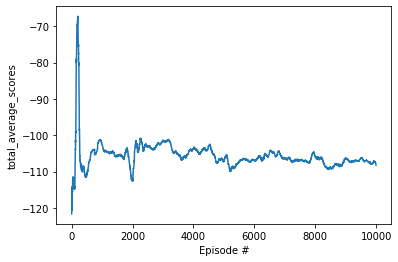

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

In [14]:
glosses = np.array(losses)[0]

In [15]:
dlosses = -np.array(losses)[1]

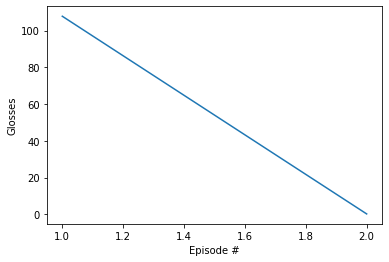

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(glosses)+1), glosses)
plt.ylabel('Glosses')
plt.xlabel('Episode #')
plt.show()

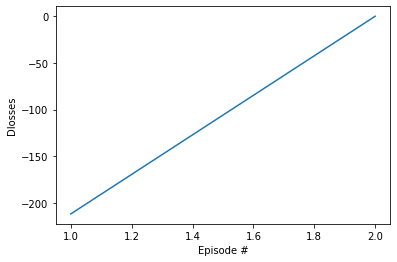

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(dlosses)+1), dlosses)
plt.ylabel('Dlosses')
plt.xlabel('Episode #')
plt.show()

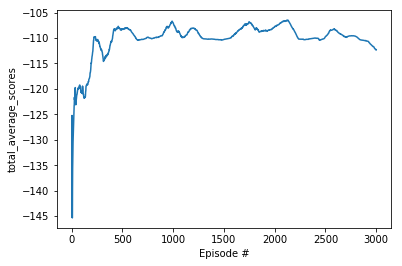

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

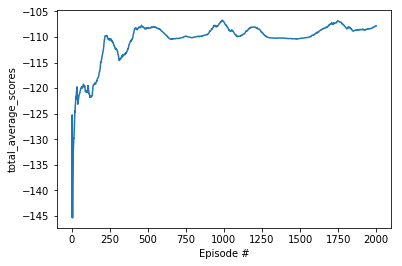

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

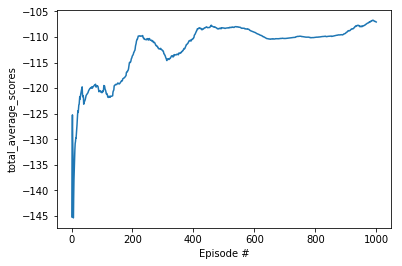

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [36]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-bipedal.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-bipedal.pth', map_location='cpu'))

# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# S = env_info.vector_observations                  # get the current states (S) (for each agent)
s = env.reset() # s: state # get the current state (s) (for an agent)
# print(s.shape)

#Rs = np.zeros(num_agents)                          # initialize the total scores (Rs) (for each agent)
R = 0 # R:total reward # initialize the total score (R) (for an agent)

while True:
    #A = agent.act(S)                        # select actions (A) from loaded model agents
    a = agent.act(np.reshape(s, [1, -1])) # a: [-1, +1]    # select action (a) from loaded model agent
    #a = agent.act(s)
    #print(s.shape, a.shape)
    
    # env_info = env.step(A)[brain_name]           # send all actions (A) to tne environment (env)
    # S2 = env_info.vector_observations         # get next states (S2) (for each agent)
    # rewards = env_info.rewards                         # get rewards (for each agent)
    # dones = env_info.local_done                        # see if the episode is done/finished (terminal)
    s2, r, done, _ = env.step(np.reshape(a, [-1]))
    #s2, r, done = env.step(a)
    
    # Rs += env_info.rewards                         # update the total scores (Rs) (for each agent)
    # S = S2                               # roll over current states (S) to next states (S2)
    R += r # update the total score (R) (for an agent)
    s = s2 # roll over current state (s) to next state (s2)
    
    #if np.any(dones):                                  # exit loop if episode is done/finished
    if done: # exit loop if episode is done/finished (terminal)
        break
        
print('Average of total scores: {}'.format(R))

Average of total scores: -106.75700939138544


When finished, you can close the environment.

In [37]:
env.close()